In [1]:
import numpy as np
import matplotlib.pyplot as plt
import athena_read as ar
import OrbitAnalysisUtils as ou
import Constants 
#from astropy.io import ascii
#import deepdish as dd
#from astropy.table import Table
#from glob import glob
from mpl_toolkits.axes_grid1 import ImageGrid
from tqdm.auto import tqdm
#from skimage import measure
import scipy
from scipy.interpolate import RegularGridInterpolator
#from scipy.interpolate import interp1d
#import plotly.graph_objects as go
#from scipy.interpolate import NearestNDInterpolator,LinearNDInterpolator
#import pyshtools
#from matplotlib.patches import Rectangle
#from astropy.modeling import models
#from astropy import units as u
#import pygyre as pg
#from astropy.timeseries import LombScargle
#from astropy.table import vstack
from scipy.special import expit
from athena_read import athdf

c=Constants.Constants()

%matplotlib inline


## reproducibility info
import reproducible
context = reproducible.Context()
context.add_cpu_info()
context.export_yaml('context.txt')

Constants defined...


'c707f2e1d647f9be6439786af4c8f209c8cdc60e636824ac6e7448bef2c058d5'

reading orbit file for binary simulation...
tperi =  9200.019


<function matplotlib.pyplot.show(close=None, block=None)>

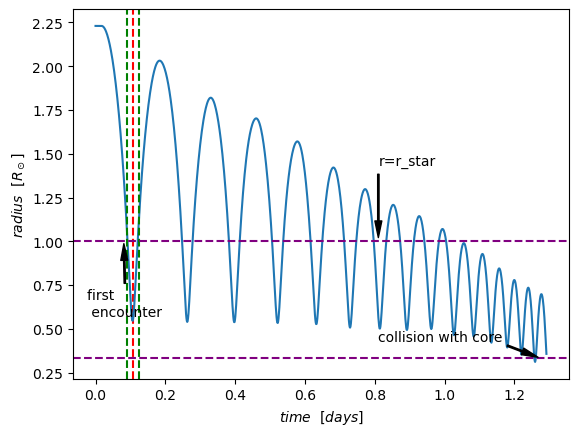

In [7]:
base_dir = '../../data/planetary_engulfment_test2/'
fig_mm = 1/25.4
Porb = 32.836*(86400)
orb = ou.read_trackfile(base_dir+"pm_trackfile.dat")

sel = (orb['time']>5000) & (orb['time']<15000)
tperi = orb[sel]['time'][ np.argmin(orb[sel]['sep']) ]
print('tperi = ',tperi)
plt.axvline(x=tperi/3600/24, color='r', linestyle='--')

# find the encounter time and the leaving time
r_star = 6.955e10
r_min = 2.31834e10
sel_left = (orb['time']>5000) & (orb['time']<tperi)
sel_right = (orb['time']<15000) & (orb['time']>tperi)

index_encounter = np.argmin(abs(orb[sel_left]['sep']-1.1*r_star))
index_leave = np.argmin(abs(orb[sel_right]['sep']-1.1*r_star))
t_encounter = orb[sel_left]['time'][index_encounter]
t_leave = orb[sel_right]['time'][index_leave]

#plot the orbit 
plt.plot(orb['time']/3600/24,orb['sep']/c.rsun)
plt.axvline(x=t_encounter/3600/24, color='g', linestyle='--')
plt.axvline(x=t_leave/3600/24, color='g', linestyle='--')
plt.axhline(y=r_star/c.rsun, color='purple', linestyle='--')
plt.axhline(y=r_min/c.rsun, color='purple', linestyle='--')
plt.annotate('r=r_star', xy=(70000/3600/24, r_star/c.rsun), xytext=(70000/3600/24, 1e11/c.rsun),
             arrowprops=dict(facecolor='black', shrink=0.05,width=1,headwidth=5))

plt.annotate('first \n encounter', xy=(7000/3600/24, r_star/c.rsun), xytext=(-2000/3600/24, 4e10/c.rsun),
             arrowprops=dict(facecolor='black', shrink=0.05,width=1,headwidth=5))

plt.annotate('collision with core', xy=(110000/3600/24, r_min/c.rsun), xytext=(70000/3600/24, 3e10/c.rsun),
             arrowprops=dict(facecolor='black', shrink=0.05,width=1,headwidth=5))
plt.ylabel('$radius \ \ [R_\odot]$')
plt.xlabel('$time \ \ [days]$')
plt.show

reading orbit file for binary simulation...
tperi =  9600.248


<function matplotlib.pyplot.show(close=None, block=None)>

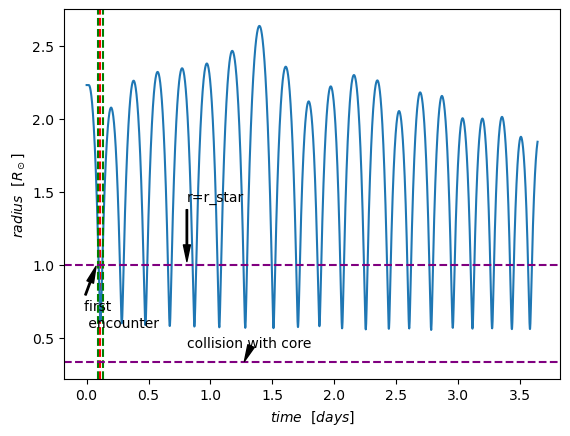

In [2]:
base_dir = '../../data/planetary_engulfment_test4/'
fig_mm = 1/25.4
Porb = 32.836*(86400)
orb = ou.read_trackfile(base_dir+"pm_trackfile.dat")

sel = (orb['time']>5000) & (orb['time']<15000)
tperi = orb[sel]['time'][ np.argmin(orb[sel]['sep']) ]
print('tperi = ',tperi)
plt.axvline(x=tperi/3600/24, color='r', linestyle='--')

# find the encounter time and the leaving time
r_star = 6.955e10
r_min = 2.31834e10
sel_left = (orb['time']>5000) & (orb['time']<tperi)
sel_right = (orb['time']<15000) & (orb['time']>tperi)

index_encounter = np.argmin(abs(orb[sel_left]['sep']-1.1*r_star))
index_leave = np.argmin(abs(orb[sel_right]['sep']-1.1*r_star))
t_encounter = orb[sel_left]['time'][index_encounter]
t_leave = orb[sel_right]['time'][index_leave]

#plot the orbit 
plt.plot(orb['time']/3600/24,orb['sep']/c.rsun)
plt.axvline(x=t_encounter/3600/24, color='g', linestyle='--')
plt.axvline(x=t_leave/3600/24, color='g', linestyle='--')
plt.axhline(y=r_star/c.rsun, color='purple', linestyle='--')
plt.axhline(y=r_min/c.rsun, color='purple', linestyle='--')
plt.annotate('r=r_star', xy=(70000/3600/24, r_star/c.rsun), xytext=(70000/3600/24, 1e11/c.rsun),
             arrowprops=dict(facecolor='black', shrink=0.05,width=1,headwidth=5))

plt.annotate('first \n encounter', xy=(7000/3600/24, r_star/c.rsun), xytext=(-2000/3600/24, 4e10/c.rsun),
             arrowprops=dict(facecolor='black', shrink=0.05,width=1,headwidth=5))

plt.annotate('collision with core', xy=(110000/3600/24, r_min/c.rsun), xytext=(70000/3600/24, 3e10/c.rsun),
             arrowprops=dict(facecolor='black', shrink=0.05,width=1,headwidth=5))
plt.ylabel('$radius \ \ [R_\odot]$')
plt.xlabel('$time \ \ [days]$')
plt.show

reading orbit file for binary simulation...
tperi =  9600.273


<function matplotlib.pyplot.show(close=None, block=None)>

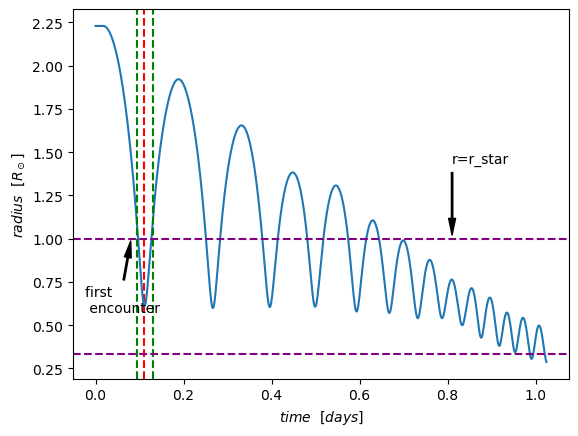

In [3]:
base_dir = '../../data/planetary_engulfment_test5/'
fig_mm = 1/25.4
Porb = 32.836*(86400)
orb = ou.read_trackfile(base_dir+"pm_trackfile.dat")

sel = (orb['time']>5000) & (orb['time']<15000)
tperi = orb[sel]['time'][ np.argmin(orb[sel]['sep']) ]
print('tperi = ',tperi)
plt.axvline(x=tperi/3600/24, color='r', linestyle='--')

# find the encounter time and the leaving time
r_star = 6.955e10
r_min = 2.31834e10
sel_left = (orb['time']>5000) & (orb['time']<tperi)
sel_right = (orb['time']<15000) & (orb['time']>tperi)

index_encounter = np.argmin(abs(orb[sel_left]['sep']-1.1*r_star))
index_leave = np.argmin(abs(orb[sel_right]['sep']-1.1*r_star))
t_encounter = orb[sel_left]['time'][index_encounter]
t_leave = orb[sel_right]['time'][index_leave]

#plot the orbit 
plt.plot(orb['time']/3600/24,orb['sep']/c.rsun)
plt.axvline(x=t_encounter/3600/24, color='g', linestyle='--')
plt.axvline(x=t_leave/3600/24, color='g', linestyle='--')
plt.axhline(y=r_star/c.rsun, color='purple', linestyle='--')
plt.axhline(y=r_min/c.rsun, color='purple', linestyle='--')
plt.annotate('r=r_star', xy=(70000/3600/24, r_star/c.rsun), xytext=(70000/3600/24, 1e11/c.rsun),
             arrowprops=dict(facecolor='black', shrink=0.05,width=1,headwidth=5))

plt.annotate('first \n encounter', xy=(7000/3600/24, r_star/c.rsun), xytext=(-2000/3600/24, 4e10/c.rsun),
             arrowprops=dict(facecolor='black', shrink=0.05,width=1,headwidth=5))

plt.annotate('collision with core', xy=(110000/3600/24, r_min/c.rsun), xytext=(70000/3600/24, 3e10/c.rsun),
             arrowprops=dict(facecolor='black', shrink=0.05,width=1,headwidth=5))
plt.ylabel('$radius \ \ [R_\odot]$')
plt.xlabel('$time \ \ [days]$')
plt.show

reading orbit file for binary simulation...
tperi =  9200.019


Text(0.5, 0, '$time \\ \\ [days]$')

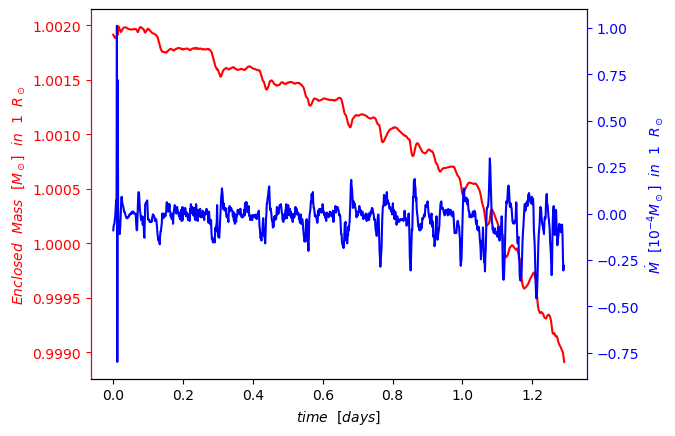

In [35]:
base_dir = '../../data/planetary_engulfment_test2/'
fig_mm = 1/25.4
Porb = 32.836*(86400)
orb = ou.read_trackfile(base_dir+"pm_trackfile.dat")

sel = (orb['time']>5000) & (orb['time']<15000)
tperi = orb[sel]['time'][ np.argmin(orb[sel]['sep']) ]
print('tperi = ',tperi)
#plt.axvline(x=tperi/3600/24, color='r', linestyle='--')

# find the encounter time and the leaving time
r_star = 6.955e10
r_min = 2.31834e10
sel_left = (orb['time']>5000) & (orb['time']<tperi)
sel_right = (orb['time']<15000) & (orb['time']>tperi)

index_encounter = np.argmin(abs(orb[sel_left]['sep']-1.1*r_star))
index_leave = np.argmin(abs(orb[sel_right]['sep']-1.1*r_star))
t_encounter = orb[sel_left]['time'][index_encounter]
t_leave = orb[sel_right]['time'][index_leave]

#plot the orbit 
fig, ax = plt.subplots()
#ax = fig.add_subplot(111)
ax2 = ax.twinx()

ax.plot(orb['time']/3600/24,orb['M_star']/c.msun,'r')

ax2.plot(orb['time'][:-1]/3600/24,(orb['M_star'][1:]-orb['M_star'][:-1])/c.msun*10000,'b')
#plt.axvline(x=t_encounter/3600/24, color='g', linestyle='--')
#plt.axvline(x=t_leave/3600/24, color='g', linestyle='--')
#plt.axhline(y=r_star/c.rsun, color='purple', linestyle='--')
#plt.axhline(y=r_min/c.rsun, color='purple', linestyle='--')
#plt.annotate('r=r_star', xy=(70000/3600/24, r_star/c.rsun), xytext=(70000/3600/24, 1e11/c.rsun),
             #arrowprops=dict(facecolor='black', shrink=0.05,width=1,headwidth=5))

#plt.annotate('first \n encounter', xy=(7000/3600/24, r_star/c.rsun), xytext=(-2000/3600/24, 4e10/c.rsun),
 #            arrowprops=dict(facecolor='black', shrink=0.05,width=1,headwidth=5))

#plt.annotate('collision with core', xy=(110000/3600/24, r_min/c.rsun), xytext=(70000/3600/24, 3e10/c.rsun),
 #            arrowprops=dict(facecolor='black', shrink=0.05,width=1,headwidth=5))
ax.set_ylabel('$Enclosed \ \ Mass\ \ [M_\odot] \ \  in \ \ 1 \ \ R_\odot$')
ax.yaxis.label.set_color('red')
ax2.spines['left'].set_color('red')
ax.tick_params(axis='y', colors='red')
ax2.set_ylabel('$\dot{M}\ \ [10^{-4} M_\odot] \ \  in \ \ 1 \ \ R_\odot$')
ax2.yaxis.label.set_color('blue')
ax2.spines['right'].set_color('blue')
ax2.tick_params(axis='y', colors='blue')
ax.set_xlabel('$time \ \ [days]$')


reading orbit file for binary simulation...
tperi =  93600.03
read_data...reading file ../../data/planetary_engulfment_test2/PEGM.out1.00180.athdf
 ...file read, constructing arrays
 ...gamma= 1.66667
...getting cartesian arrays...
max B is 238991006655.03955
min B is -9406682380488348.0
read_data...reading file ../../data/planetary_engulfment_test2/PEGM.out1.00185.athdf
 ...file read, constructing arrays
 ...gamma= 1.66667
...getting cartesian arrays...
max B is 32893166453.20851
min B is -9381701943888812.0
read_data...reading file ../../data/planetary_engulfment_test2/PEGM.out1.00190.athdf
 ...file read, constructing arrays
 ...gamma= 1.66667
...getting cartesian arrays...
max B is 64325937131.34987
min B is -9414709827551228.0
read_data...reading file ../../data/planetary_engulfment_test2/PEGM.out1.00195.athdf
 ...file read, constructing arrays
 ...gamma= 1.66667
...getting cartesian arrays...
max B is 60351662606.46733
min B is -9389455546976044.0
read_data...reading file ../../da

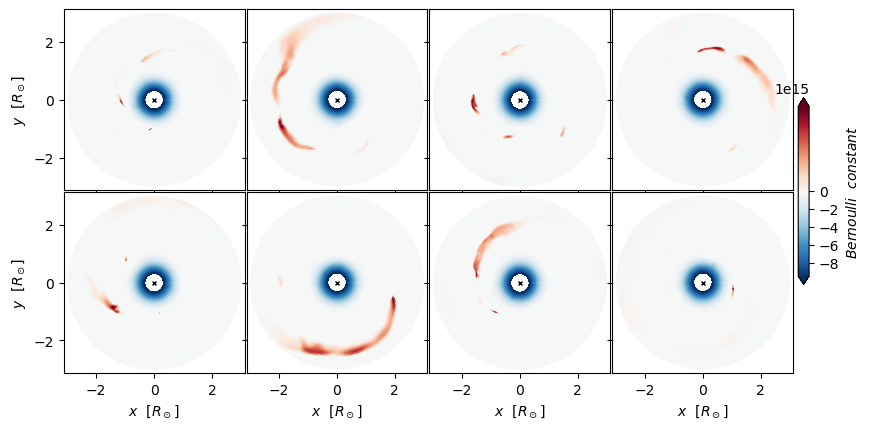

In [2]:
# plot unbounded mass by Bernoulli constant

base_dir = '../../data/planetary_engulfment_test2/'
fig_mm = 1/25.4 #figure size
Porb = 10000   # ? orbit period time
orb = ou.read_trackfile(base_dir+"pm_trackfile.dat")
sel = (orb['time']>75000) & (orb['time']<95000)    
tperi = orb[sel]['time'][ np.argmin(orb[sel]['sep']) ]
print('tperi = ',tperi)

filelist = [base_dir + "PEGM.out1.00180.athdf",
            base_dir + "PEGM.out1.00185.athdf",
           base_dir + "PEGM.out1.00190.athdf",
           base_dir + "PEGM.out1.00195.athdf",
           base_dir + "PEGM.out1.00200.athdf",
           base_dir + "PEGM.out1.00205.athdf",
           base_dir + "PEGM.out1.00210.athdf",
           base_dir + "PEGM.out1.00215.athdf"]

thind = 0
mylevel = None
x2slicevalue=ou.get_midplane_theta(filelist[0],level=mylevel)

fig = plt.figure(figsize=(360*fig_mm,120*fig_mm))
grid = ImageGrid(fig,111,nrows_ncols=[2,4],
                 cbar_location="right",
                 cbar_mode="single",
                 cbar_size='3%',
                 cbar_pad=0.05)


r0thresh = 0.

    

for i,myfile in enumerate(filelist):
    gamma=1.66667
    d = ou.read_data(myfile,orb,gamma=gamma,level=mylevel,x2_min=x2slicevalue,x2_max=x2slicevalue,
                       get_energy=False,profile_file=base_dir+'polytrope.dat')

    x2,y2,z2 = ou.pos_secondary(orb,d['Time'])

    rcom,vcom = ou.rcom_vcom(orb,d['Time'])
    
    
    v_abs = np.sqrt(d['vel1']**2+d['vel2']**2+d['vel3']**2)
    r_phi = np.loadtxt(base_dir+"potential.dat")
    phi_interp = scipy.interpolate.interp1d(r_phi[:,0],r_phi[:,1])
    phi_r = phi_interp(d['x1v'])
    B = d['rho']*d['r0']*v_abs**2/2+d['rho']*d['r0']*phi_r+d['press']*(1+1/(gamma-1))
    
    
    ### DENSITY
    from matplotlib.colors import TwoSlopeNorm
    
    B_mid =ou.get_plot_array_midplane(np.where(d['r0'][:,thind,:]>r0thresh,(B)[:,thind,:],np.nan))
    print('max B is',np.max(B_mid))
    print('min B is',np.min(B_mid))
    norm = TwoSlopeNorm(vmin = np.min(B_mid),vcenter=0,vmax=np.max(B_mid))

    im=grid[i].pcolormesh( ou.get_plot_array_midplane(d['x'][:,thind,:]-rcom[0])/c.rsun, 
                           ou.get_plot_array_midplane(d['y'][:,thind,:] -rcom[1])/c.rsun,
                           B_mid,
            norm = norm,cmap='RdBu_r',shading='gouraud',rasterized=True,zorder=0
            )
    #cb=grid.cbar_axes[0].colorbar(im,extend='both')
    cb=plt.colorbar(im,extend='both',cax=grid.cbar_axes[0],label=r'$Bernoulli \ \ constant$')
    #cb.set_label_text(r'$\log_{10}\left( \rho \right)$  [g cm$^{-3}$]')
    cb.solids.set_edgecolor('face')

    grid[i].set_ylim(-2*1.0865e11/c.rsun,2*1.0865e11/c.rsun)
    grid[i].set_xlim(-2*1.0865e11/c.rsun,2*1.0865e11/c.rsun)
    grid[i].plot([0],[0],'kx',markersize=3)

    grid[i].set_xlabel('$x \ \ [R_\odot]$')
    grid[i].set_ylabel('$y \ \ [R_\odot]$')

In [2]:
# plot unbounded mass by Bernoulli constant
def find_r(file, r_given):
    r_given_filelike = r_given*np.ones_like(file)
    r_index = np.argmin(np.abs(file-r_given_filelike))
    return r_index

def m_dot_parallel(i,myfile,phi_interp,gamma,rclist,m_dot_time,time):
    d = athdf(myfile)
    print(myfile+" file readed...")
    time[i] = d["Time"]
    
    v_abs = np.sqrt(d['vel1']**2+d['vel2']**2+d['vel3']**2)
    phi_r = phi_interp(d['x1v'])
    B = d['rho']*d['r0']*v_abs**2/2+d['rho']*d['r0']*phi_r+d['press']*(1+1/(gamma-1))
    
    ### caluculate the M_dot at rc
    for j,rc in enumerate(rclist):
        rc_index = find_r(d['x1v'],rc)
        d_theta = np.pi/d['rho'].shape[1]
        d_phi = 2*np.pi/d['rho'].shape[0]
        M_dot_tp = np.where(d['vel1'][:,:,rc_index]>0,(d['rho']*d['r0']*d['vel1'])[:,:,rc_index],0)
        M_dot_tp = np.where(B[:,:,rc_index]>=0,M_dot_tp,0)
        M_dot_tp = np.dot(M_dot_tp,np.sin(d['x2v']))
        M_dot = np.sum(M_dot_tp)*rc**2*d_theta*d_phi
        
        m_dot_time_i = m_dot_time[i]
        m_dot_time_i[j] = M_dot
        m_dot_time[i] = m_dot_time_i
        
base_dir = '../../data/planetary_engulfment_test2/'
r_phi = np.loadtxt(base_dir+"potential.dat")
phi_interp = scipy.interpolate.interp1d(r_phi[:,0],r_phi[:,1])


filelist = []
start_id = 0
for id_name in range(210):
    datafile = base_dir + "PEGM.out1."+str(id_name+start_id).zfill(5)+".athdf"
    filelist.append(datafile)


n_file = len(filelist)
gamma=1.66667
rclist = c.rsun*np.linspace(1.0,3.0,num=5)

"""
    Use multiprocessing.Process to parallel execution
"""
from multiprocessing import Pool,Array,Process,Manager
    
     
p_list = []
manager = Manager()
m_dot_time = manager.list(np.zeros((n_file,5),dtype=np.float64))
time = manager.list(np.zeros((n_file,),dtype=np.float64))
     
pool = Pool(20)
for i,myfile in enumerate(filelist):
    pool.apply_async(m_dot_parallel, args=(i,myfile,phi_interp,gamma,rclist,m_dot_time,time))
    
pool.close()
pool.join()
    
print("done!")

../../data/planetary_engulfment_test2/PEGM.out1.00008.athdf file readed...
../../data/planetary_engulfment_test2/PEGM.out1.00005.athdf file readed...
../../data/planetary_engulfment_test2/PEGM.out1.00001.athdf file readed...
../../data/planetary_engulfment_test2/PEGM.out1.00016.athdf file readed...
../../data/planetary_engulfment_test2/PEGM.out1.00009.athdf file readed...
../../data/planetary_engulfment_test2/PEGM.out1.00006.athdf file readed...
../../data/planetary_engulfment_test2/PEGM.out1.00004.athdf file readed...
../../data/planetary_engulfment_test2/PEGM.out1.00011.athdf file readed...
../../data/planetary_engulfment_test2/PEGM.out1.00013.athdf file readed...
../../data/planetary_engulfment_test2/PEGM.out1.00015.athdf file readed...
../../data/planetary_engulfment_test2/PEGM.out1.00017.athdf file readed...
../../data/planetary_engulfment_test2/PEGM.out1.00002.athdf file readed...
../../data/planetary_engulfment_test2/PEGM.out1.00000.athdf file readed...../../data/planetary_engul

In [3]:
#time_np = np.array(time)
#m_dot_time_np = np.array(m_dot_time)
print(time)
print((m_dot_time))


[0.0, 500.00494, 1000.062, 1500.045, 2000.0553, 2500.001, 3000.0117, 3500.0427, 4000.039, 4500.01, 5000.0444, 5500.064, 6000.0557, 6500.0034, 7000.01, 7500.053, 8000.0303, 8500.014, 9000.059, 9500.052, 10000.047, 10500.004, 11000.021, 11500.014, 12000.003, 12500.07, 13000.007, 13500.007, 14000.058, 14500.053, 15000.071, 15500.06, 16000.069, 16500.033, 17000.049, 17500.023, 18000.053, 18500.043, 19000.047, 19500.059, 20000.021, 20500.027, 21000.06, 21500.074, 22000.064, 22500.04, 23000.006, 23500.006, 24000.074, 24500.027, 25000.043, 25500.064, 26000.068, 26500.045, 27000.014, 27500.01, 28000.01, 28500.03, 29000.025, 29500.023, 30000.006, 30500.04, 31000.066, 31500.037, 32000.041, 32500.045, 33000.03, 33500.066, 34000.01, 34500.02, 35000.074, 35500.035, 36000.03, 36500.035, 37000.062, 37500.06, 38000.05, 38500.01, 39000.043, 39500.023, 40000.004, 40500.07, 41000.06, 41500.04, 42000.03, 42500.03, 43000.05, 43500.035, 44000.027, 44500.023, 45000.016, 45500.035, 46000.035, 46500.01, 47000.

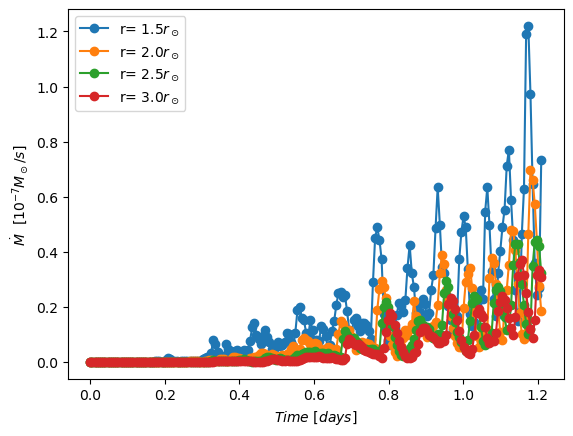

In [8]:
fig,ax = plt.subplots()

for i in np.linspace(1,4,num=4,dtype=int):
    ax.plot(np.array(time)/3600/24,np.array(m_dot_time)[:,i]/c.msun*10**7,'-o',label=r"r= %.1f$r_\odot$" %(i*0.5+1))
ax.set_xlabel('$Time\\ [days]$')
ax.set_ylabel('$\dot{M}\ \ [10^{-7} M_\odot/s]$')
ax.legend()

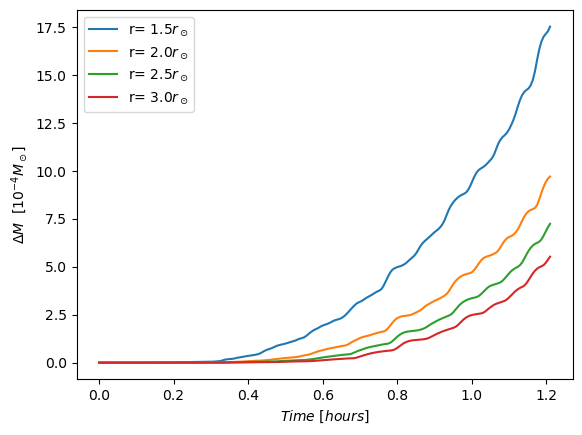

In [10]:
# calculate the cumulated mass loss
time_post = np.array(time)
m_dot_time_post = np.array(m_dot_time)

n_time = np.shape(m_dot_time_post)[0]
n_line = np.shape(m_dot_time_post)[1]
delta_M = np.zeros((n_time,n_line))
for i in range(n_time-1):
    delta_M[i+1,:] = delta_M[i,:]+(m_dot_time_post[i,:]+m_dot_time_post[i+1,:])/2*(time[i+1]-time[i])
    
fig,ax = plt.subplots()

for i in np.linspace(1,4,num=4,dtype=int):
    ax.plot(time_post/3600/24,delta_M[:,i]/c.msun*10**4,label=r"r= %.1f$r_\odot$" %(i*0.5+1))
ax.set_xlabel('$Time\\ [hours]$')
ax.set_ylabel('$\Delta M \ \ [10^{-4} M_\odot]$')
ax.legend()

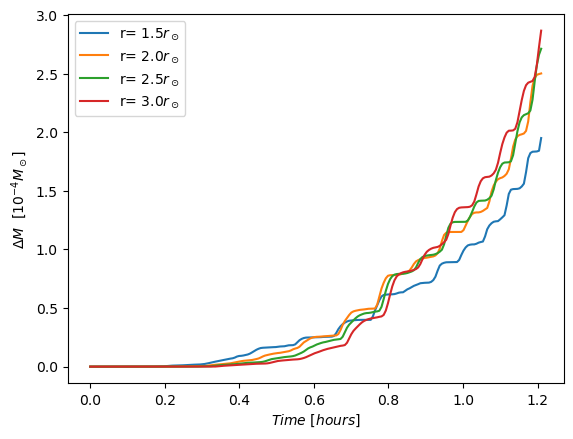

In [4]:
# calculate the cumulated mass loss using Bornoulli parameter
time_post = np.array(time)
m_dot_time_post = np.array(m_dot_time)

n_time = np.shape(m_dot_time_post)[0]
n_line = np.shape(m_dot_time_post)[1]
delta_M = np.zeros((n_time,n_line))
for i in range(n_time-1):
    delta_M[i+1,:] = delta_M[i,:]+(m_dot_time_post[i,:]+m_dot_time_post[i+1,:])/2*(time[i+1]-time[i])
    
fig,ax = plt.subplots()

for i in np.linspace(1,4,num=4,dtype=int):
    ax.plot(time_post/3600/24,delta_M[:,i]/c.msun*10**4,label=r"r= %.1f$r_\odot$" %(i*0.5+1))
ax.set_xlabel('$Time\\ [hours]$')
ax.set_ylabel('$\Delta M \ \ [10^{-4} M_\odot]$')
ax.legend()

reading orbit file for binary simulation...
tperi =  9200.019


Text(0.5, 0, '$Time \\ \\ [days]$')

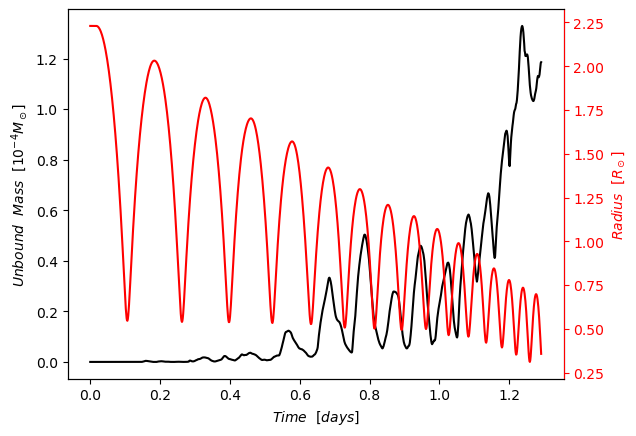

In [22]:
base_dir = '../../data/planetary_engulfment_test2/'
fig_mm = 1/25.4
Porb = 32.836*(86400)
orb = ou.read_trackfile(base_dir+"pm_trackfile.dat")

sel = (orb['time']>5000) & (orb['time']<15000)
tperi = orb[sel]['time'][ np.argmin(orb[sel]['sep']) ]
print('tperi = ',tperi)
#plt.axvline(x=tperi/3600/24, color='r', linestyle='--')

# find the encounter time and the leaving time
r_star = 6.955e10
r_min = 2.31834e10
sel_left = (orb['time']>5000) & (orb['time']<tperi)
sel_right = (orb['time']<15000) & (orb['time']>tperi)

index_encounter = np.argmin(abs(orb[sel_left]['sep']-1.1*r_star))
index_leave = np.argmin(abs(orb[sel_right]['sep']-1.1*r_star))
t_encounter = orb[sel_left]['time'][index_encounter]
t_leave = orb[sel_right]['time'][index_leave]

#plot the orbit 
fig, ax = plt.subplots()
#ax = fig.add_subplot(111)
ax2 = ax.twinx()

ax.plot(orb['time']/3600/24,orb['mu']/c.msun*10000,'b')
ax.get_lines()[0].set_color("black")

ax2.plot(orb['time']/3600/24,orb['sep']/c.rsun,'r')
#plt.axvline(x=t_encounter/3600/24, color='g', linestyle='--')
#plt.axvline(x=t_leave/3600/24, color='g', linestyle='--')
#plt.axhline(y=r_star/c.rsun, color='purple', linestyle='--')
#plt.axhline(y=r_min/c.rsun, color='purple', linestyle='--')
#plt.annotate('r=r_star', xy=(70000/3600/24, r_star/c.rsun), xytext=(70000/3600/24, 1e11/c.rsun),
             #arrowprops=dict(facecolor='black', shrink=0.05,width=1,headwidth=5))

#plt.annotate('first \n encounter', xy=(7000/3600/24, r_star/c.rsun), xytext=(-2000/3600/24, 4e10/c.rsun),
 #            arrowprops=dict(facecolor='black', shrink=0.05,width=1,headwidth=5))

#plt.annotate('collision with core', xy=(110000/3600/24, r_min/c.rsun), xytext=(70000/3600/24, 3e10/c.rsun),
 #            arrowprops=dict(facecolor='black', shrink=0.05,width=1,headwidth=5))
ax.set_ylabel('$Unbound \ \ Mass\ \ [10^{-4} M_\odot]$')
#ax.yaxis.label.set_color('red')
ax2.spines['right'].set_color('red')
ax2.tick_params(axis='y', colors='red')
ax2.set_ylabel('$Radius \ \ [R_\odot]$')
ax2.yaxis.label.set_color('red')
#ax2.spines['right'].set_color('blue')
#ax2.tick_params(axis='y', colors='blue')
ax.set_xlabel('$Time \ \ [days]$')


In [14]:
# plot unbounded mass by Bernoulli constant
def find_r(file, r_given):
    r_given_filelike = r_given*np.ones_like(file)
    r_index = np.argmin(np.abs(file-r_given_filelike))
    return r_index

base_dir = '../../data/planetary_engulfment_test2/'



filelist = []
start_id = 180
for id_name in range(30):
    datafile = base_dir + "PEGM.out1."+str(id_name+start_id).zfill(5)+".athdf"
    filelist.append(datafile)
'''    
filelist = [base_dir + "PEGM.out1.00180.athdf",
            base_dir + "PEGM.out1.00185.athdf",
           base_dir + "PEGM.out1.00190.athdf",
           base_dir + "PEGM.out1.00195.athdf",
           base_dir + "PEGM.out1.00200.athdf",
           base_dir + "PEGM.out1.00205.athdf",
           base_dir + "PEGM.out1.00210.athdf",
           base_dir + "PEGM.out1.00215.athdf"]
'''
n_file = len(filelist)
m_dot_time = np.zeros((n_file,5),dtype=np.float64)
time = np.zeros((n_file,5),dtype=np.float64)
gamma=1.66667
rclist = c.rsun*np.linspace(1.0,3.0,num=5)

for i,myfile in enumerate(filelist):
    d = athdf(myfile)
    print(myfile+" file readed...")
    

    v_abs = np.sqrt(d['vel1']**2+d['vel2']**2+d['vel3']**2)
    r_phi = np.loadtxt(base_dir+"potential.dat")
    phi_interp = scipy.interpolate.interp1d(r_phi[:,0],r_phi[:,1])
    phi_r = phi_interp(d['x1v'])
    B = d['rho']*d['r0']*v_abs**2/2+d['rho']*d['r0']*phi_r+d['press']*(1+1/(gamma-1))
    
    ### caluculate the M_dot at rc
    for j,rc in enumerate(rclist):
        rc_index = find_r(d['x1v'],rc)
        d_theta = np.pi/d['rho'].shape[1]
        d_phi = 2*np.pi/d['rho'].shape[0]
        M_dot_tp = np.where(d['vel1'][:,:,rc_index]>0,(d['rho']*d['r0']*d['vel1'])[:,:,rc_index],0)
        M_dot_tp = np.where(B[:,:,rc_index]>=0,M_dot_tp,0)
        M_dot_tp = np.dot(M_dot_tp,np.sin(d['x2v']))
        M_dot = np.sum(M_dot_tp)*rc**2*d_theta*d_phi
    
        m_dot_time[i,j] = M_dot
        time[i,j] = d["Time"]
    
print("Done!")

../../data/planetary_engulfment_test2/PEGM.out1.00180.athdf file readed...
../../data/planetary_engulfment_test2/PEGM.out1.00181.athdf file readed...
../../data/planetary_engulfment_test2/PEGM.out1.00182.athdf file readed...
../../data/planetary_engulfment_test2/PEGM.out1.00183.athdf file readed...
../../data/planetary_engulfment_test2/PEGM.out1.00184.athdf file readed...
../../data/planetary_engulfment_test2/PEGM.out1.00185.athdf file readed...
../../data/planetary_engulfment_test2/PEGM.out1.00186.athdf file readed...
../../data/planetary_engulfment_test2/PEGM.out1.00187.athdf file readed...
../../data/planetary_engulfment_test2/PEGM.out1.00188.athdf file readed...
../../data/planetary_engulfment_test2/PEGM.out1.00189.athdf file readed...
../../data/planetary_engulfment_test2/PEGM.out1.00190.athdf file readed...
../../data/planetary_engulfment_test2/PEGM.out1.00191.athdf file readed...
../../data/planetary_engulfment_test2/PEGM.out1.00192.athdf file readed...
../../data/planetary_engu

In [15]:
# calculate the cumulated mass loss
n_time = np.shape(time)[0]
n_line = np.shape(time)[1]
delta_M = np.zeros((n_time,n_line))
for i in range(n_time-1):
    delta_M[i+1,:] = delta_M[i,:]+(m_dot_time[i,:]+m_dot_time[i+1,:])/2*(time[i+1,:]-time[i,:])

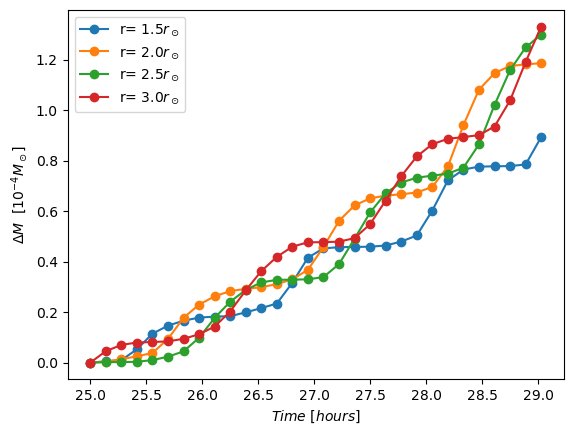

In [16]:
# using bernoulli parameter to apply futhremore criteria
fig,ax = plt.subplots()

for i in np.linspace(1,4,num=4,dtype=int):
    ax.plot(time[:,i]/3600,delta_M[:,i]/c.msun*10**4,'-o',label=r"r= %.1f$r_\odot$" %(i*0.5+1))
ax.set_xlabel('$Time\\ [hours]$')
ax.set_ylabel('$\Delta M \ \ [10^{-4} M_\odot]$')
ax.legend()

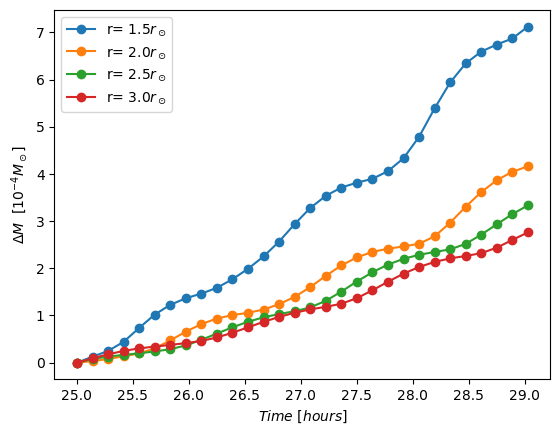

In [7]:
fig,ax = plt.subplots()

for i in np.linspace(1,4,num=4,dtype=int):
    ax.plot(time[:,i]/3600,delta_M[:,i]/c.msun*10**4,'-o',label=r"r= %.1f$r_\odot$" %(i*0.5+1))
ax.set_xlabel('$Time\\ [hours]$')
ax.set_ylabel('$\Delta M \ \ [10^{-4} M_\odot]$')
ax.legend()

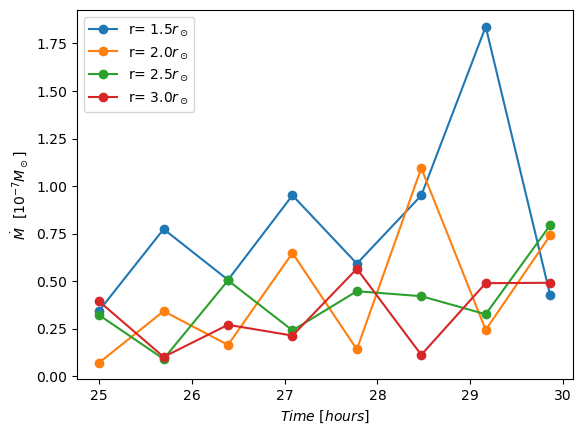

In [20]:
fig,ax = plt.subplots()

for i in np.linspace(1,4,num=4,dtype=int):
    ax.plot(time[:,i]/3600,m_dot_time[:,i]/c.msun*10**7,'-o',label=r"r= %.1f$r_\odot$" %(i*0.5+1))
ax.set_xlabel('$Time\\ [hours]$')
ax.set_ylabel('$\dot{M}\ \ [10^{-7} M_\odot]$')
ax.legend()


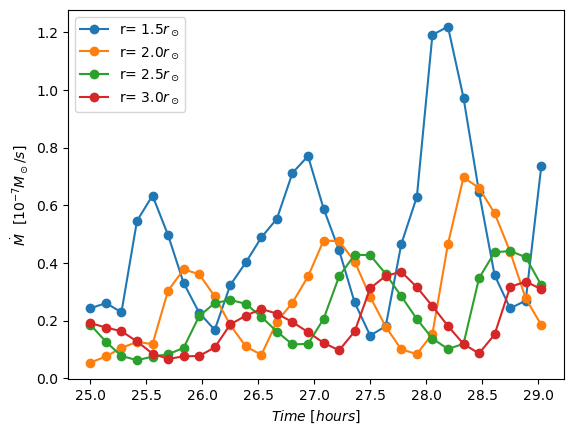

In [9]:
fig,ax = plt.subplots()

for i in np.linspace(1,4,num=4,dtype=int):
    ax.plot(time[:,i]/3600,m_dot_time[:,i]/c.msun*10**7,'-o',label=r"r= %.1f$r_\odot$" %(i*0.5+1))
ax.set_xlabel('$Time\\ [hours]$')
ax.set_ylabel('$\dot{M}\ \ [10^{-7} M_\odot/s]$')
ax.legend()


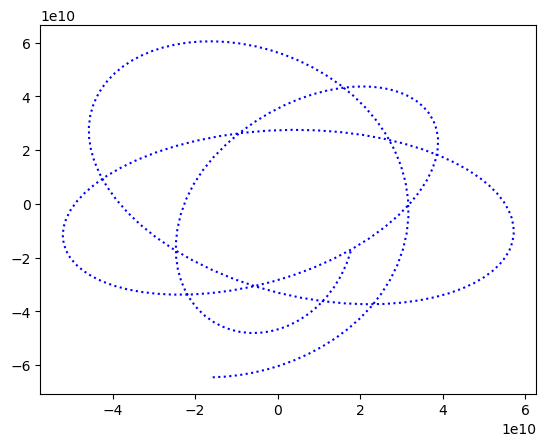

In [8]:
index_encouter_global = np.where(orb['time']==t_encounter)[0][0]
index_leave_global = np.where(orb['time']==t_leave)[0][0]

plt.plot(orb['x'][-200:],orb['y'][-200:], color='b', linestyle='dotted')
#plt.plot(orb['x'][index_encouter_global : index_leave_global],orb['y'][index_encouter_global : index_leave_global], color='r', linestyle='dotted')


reading orbit file for binary simulation...
tperi =  9200.019
read_data...reading file ../../data/planetery_engulfment_test2/PEGM.out1.00017.athdf
 ...file read, constructing arrays
 ...gamma= 1.66667
...getting cartesian arrays...
read_data...reading file ../../data/planetery_engulfment_test2/PEGM.out1.00018.athdf
 ...file read, constructing arrays
 ...gamma= 1.66667
...getting cartesian arrays...
read_data...reading file ../../data/planetery_engulfment_test2/PEGM.out1.00019.athdf
 ...file read, constructing arrays
 ...gamma= 1.66667
...getting cartesian arrays...
read_data...reading file ../../data/planetery_engulfment_test2/PEGM.out1.00021.athdf
 ...file read, constructing arrays
 ...gamma= 1.66667
...getting cartesian arrays...


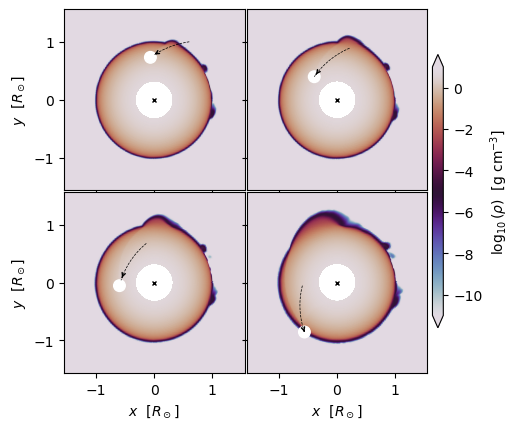

In [5]:
base_dir = '../../data/planetery_engulfment_test2/'
fig_mm = 1/25.4 #figure size
Porb = 10000   # ? orbit period time
orb = ou.read_trackfile(base_dir+"pm_trackfile.dat")
sel = (orb['time']>5000) & (orb['time']<15000)    
tperi = orb[sel]['time'][ np.argmin(orb[sel]['sep']) ]
print('tperi = ',tperi)

filelist = [base_dir + "PEGM.out1.00017.athdf",
            base_dir + "PEGM.out1.00018.athdf",
           base_dir + "PEGM.out1.00019.athdf",
           base_dir + "PEGM.out1.00021.athdf"]

thind = 0
mylevel = None
x2slicevalue=ou.get_midplane_theta(filelist[0],level=mylevel)

#fig,ax = plt.subplots(nrows=2,ncols=2,figsize=(13,7.9),
#                      sharey=True,sharex=True)
fig = plt.figure(figsize=(180*fig_mm,120*fig_mm))
grid = ImageGrid(fig,111,nrows_ncols=[2,2],
                 cbar_location="right",
                 cbar_mode="single",
                 cbar_size='3%',
                 cbar_pad=0.05)


r0thresh = 0.

def add_arrow(line, position=None, direction='right', size=15, color=None):
    """
    add an arrow to a line.

    line:       Line2D object
    position:   x-position of the arrow. If None, mean of xdata is taken
    direction:  'left' or 'right'
    size:       size of the arrow in fontsize points
    color:      if None, line color is taken.
    """
    line = line[0]
    if color is None:
        color = line.get_color()

    xdata = line.get_xdata()
    ydata = line.get_ydata()

    if position is None:
        position = xdata[-2] #xdata.mean()
    # find closest index
    start_ind = np.argmin(np.absolute(xdata - position))
    if direction == 'right':
        end_ind = start_ind + 1
    else:
        end_ind = start_ind - 1

    line.axes.annotate('',
        xytext=(xdata[start_ind], ydata[start_ind]),
        xy=(xdata[end_ind], ydata[end_ind]),
        arrowprops=dict(arrowstyle="->", color=color),
        size=size
    )

    


for i,myfile in enumerate(filelist):
    d = ou.read_data(myfile,orb,gamma=1.66667,level=mylevel,x2_min=x2slicevalue,x2_max=x2slicevalue,
                       get_energy=False,profile_file=base_dir+'polytrope.dat')

    x2,y2,z2 = ou.pos_secondary(orb,d['Time'])

    rcom,vcom = ou.rcom_vcom(orb,d['Time'])
    
    
    ### DENSITY
    im=grid[i].pcolormesh( ou.get_plot_array_midplane(d['x'][:,thind,:]-rcom[0])/c.rsun, 
                           ou.get_plot_array_midplane(d['y'][:,thind,:] -rcom[1])/c.rsun,
                           ou.get_plot_array_midplane(np.where(d['r0'][:,thind,:]>r0thresh, np.log10((d['r0']*d['rho'])[:,thind,:]),np.nan ) ),
               cmap='twilight',vmin=-11,vmax=1,shading='gouraud',rasterized=True,zorder=0
            )
    #cb=grid.cbar_axes[0].colorbar(im,extend='both')
    cb=plt.colorbar(im,extend='both',cax=grid.cbar_axes[0],label=r'$\log_{10}\left( \rho \right)$  [g cm$^{-3}$]')
    #cb.set_label_text(r'$\log_{10}\left( \rho \right)$  [g cm$^{-3}$]')
    cb.solids.set_edgecolor('face')
    
    grid[i].annotate(r"$t-t_{\rm p}=$"+str(round((d['Time']-tperi)/86400.,1))+"d", (100,80),fontsize=7)
    
    grid[i].add_patch(plt.Circle([(x2-rcom[0])/c.rsun,(y2-rcom[1])/c.rsun],radius=0.1,color='white') )
        #grid[i].plot((x2-rcom[0])/c.rsun,(y2-rcom[1])/c.rsun,'wo',markersize=12,zorder=1,markeredgecolor='k')
    grid[i].set_ylim(-1.0865e11/c.rsun,1.0865e11/c.rsun)
    grid[i].set_xlim(-1.0865e11/c.rsun,1.0865e11/c.rsun)
    sel = (orb['time']>d['Time']-Porb/10) & (orb['time']<=d['Time'])
    l2 = grid[i].plot((orb[sel]['x']-orb[sel]['xcom'])/c.rsun,(orb[sel]['y']-orb[sel]['ycom'])/c.rsun,'k--',lw=0.5)
    #l1 = grid[i].plot(-orb[sel]['xcom']/c.rsun,-orb[sel]['ycom']/c.rsun,'k:',lw=0.5)
    grid[i].plot([0],[0],'kx',markersize=3)
    add_arrow(l2,size=6)
    #add_arrow(l1,size=6)
    grid[i].set_xlabel('$x \ \ [R_\odot]$')
    grid[i].set_ylabel('$y \ \ [R_\odot]$')
    


reading orbit file for binary simulation...
tperi =  93600.03
read_data...reading file ../../data/planetary_engulfment_test2/PEGM.out1.00180.athdf
 ...file read, constructing arrays
 ...gamma= 1.66667
...getting cartesian arrays...
read_data...reading file ../../data/planetary_engulfment_test2/PEGM.out1.00185.athdf
 ...file read, constructing arrays
 ...gamma= 1.66667
...getting cartesian arrays...
read_data...reading file ../../data/planetary_engulfment_test2/PEGM.out1.00190.athdf
 ...file read, constructing arrays
 ...gamma= 1.66667
...getting cartesian arrays...
read_data...reading file ../../data/planetary_engulfment_test2/PEGM.out1.00195.athdf
 ...file read, constructing arrays
 ...gamma= 1.66667
...getting cartesian arrays...
read_data...reading file ../../data/planetary_engulfment_test2/PEGM.out1.00200.athdf
 ...file read, constructing arrays
 ...gamma= 1.66667
...getting cartesian arrays...
read_data...reading file ../../data/planetary_engulfment_test2/PEGM.out1.00205.athdf
 ..

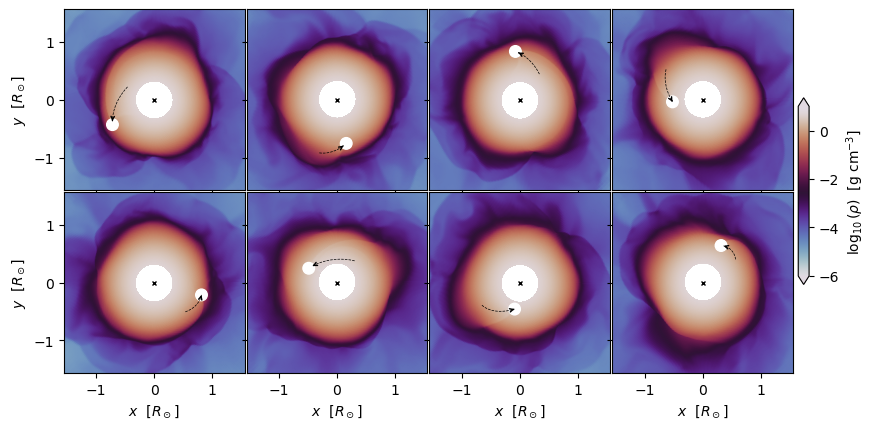

In [13]:
base_dir = '../../data/planetary_engulfment_test2/'
fig_mm = 1/25.4 #figure size
Porb = 10000   # ? orbit period time
orb = ou.read_trackfile(base_dir+"pm_trackfile.dat")
sel = (orb['time']>75000) & (orb['time']<95000)    
tperi = orb[sel]['time'][ np.argmin(orb[sel]['sep']) ]
print('tperi = ',tperi)

filelist = [base_dir + "PEGM.out1.00180.athdf",
            base_dir + "PEGM.out1.00185.athdf",
           base_dir + "PEGM.out1.00190.athdf",
           base_dir + "PEGM.out1.00195.athdf",
           base_dir + "PEGM.out1.00200.athdf",
           base_dir + "PEGM.out1.00205.athdf",
           base_dir + "PEGM.out1.00210.athdf",
           base_dir + "PEGM.out1.00215.athdf"]

thind = 0
mylevel = None
x2slicevalue=ou.get_midplane_theta(filelist[0],level=mylevel)

#fig,ax = plt.subplots(nrows=2,ncols=2,figsize=(13,7.9),
#                      sharey=True,sharex=True)
fig = plt.figure(figsize=(360*fig_mm,120*fig_mm))
grid = ImageGrid(fig,111,nrows_ncols=[2,4],
                 cbar_location="right",
                 cbar_mode="single",
                 cbar_size='3%',
                 cbar_pad=0.05)


r0thresh = 0.

def add_arrow(line, position=None, direction='right', size=15, color=None):
    """
    add an arrow to a line.

    line:       Line2D object
    position:   x-position of the arrow. If None, mean of xdata is taken
    direction:  'left' or 'right'
    size:       size of the arrow in fontsize points
    color:      if None, line color is taken.
    """
    line = line[0]
    if color is None:
        color = line.get_color()

    xdata = line.get_xdata()
    ydata = line.get_ydata()

    if position is None:
        position = xdata[-2] #xdata.mean()
    # find closest index
    start_ind = np.argmin(np.absolute(xdata - position))
    if direction == 'right':
        end_ind = start_ind + 1
    else:
        end_ind = start_ind - 1

    line.axes.annotate('',
        xytext=(xdata[start_ind], ydata[start_ind]),
        xy=(xdata[end_ind], ydata[end_ind]),
        arrowprops=dict(arrowstyle="->", color=color),
        size=size
    )

    


for i,myfile in enumerate(filelist):
    d = ou.read_data(myfile,orb,gamma=1.66667,level=mylevel,x2_min=x2slicevalue,x2_max=x2slicevalue,
                       get_energy=False,profile_file=base_dir+'polytrope.dat')

    x2,y2,z2 = ou.pos_secondary(orb,d['Time'])

    rcom,vcom = ou.rcom_vcom(orb,d['Time'])
    
    
    ### DENSITY
    im=grid[i].pcolormesh( ou.get_plot_array_midplane(d['x'][:,thind,:]-rcom[0])/c.rsun, 
                           ou.get_plot_array_midplane(d['y'][:,thind,:] -rcom[1])/c.rsun,
                           ou.get_plot_array_midplane(np.where(d['r0'][:,thind,:]>r0thresh, np.log10((d['r0']*d['rho'])[:,thind,:]),np.nan ) ),
               cmap='twilight',vmin=-6,vmax=1,shading='gouraud',rasterized=True,zorder=0
            )
    #cb=grid.cbar_axes[0].colorbar(im,extend='both')
    cb=plt.colorbar(im,extend='both',cax=grid.cbar_axes[0],label=r'$\log_{10}\left( \rho \right)$  [g cm$^{-3}$]')
    #cb.set_label_text(r'$\log_{10}\left( \rho \right)$  [g cm$^{-3}$]')
    cb.solids.set_edgecolor('face')
    
    grid[i].annotate(r"$t-t_{\rm p}=$"+str(round((d['Time']-tperi)/86400.,1))+"d", (100,80),fontsize=7)
    
    grid[i].add_patch(plt.Circle([(x2-rcom[0])/c.rsun,(y2-rcom[1])/c.rsun],radius=0.1,color='white') )
        #grid[i].plot((x2-rcom[0])/c.rsun,(y2-rcom[1])/c.rsun,'wo',markersize=12,zorder=1,markeredgecolor='k')
    grid[i].set_ylim(-1.0865e11/c.rsun,1.0865e11/c.rsun)
    grid[i].set_xlim(-1.0865e11/c.rsun,1.0865e11/c.rsun)
    sel = (orb['time']>d['Time']-Porb/10) & (orb['time']<=d['Time'])
    l2 = grid[i].plot((orb[sel]['x']-orb[sel]['xcom'])/c.rsun,(orb[sel]['y']-orb[sel]['ycom'])/c.rsun,'k--',lw=0.5)
    #l1 = grid[i].plot(-orb[sel]['xcom']/c.rsun,-orb[sel]['ycom']/c.rsun,'k:',lw=0.5)
    grid[i].plot([0],[0],'kx',markersize=3)
    add_arrow(l2,size=6)
    #add_arrow(l1,size=6)
    grid[i].set_xlabel('$x \ \ [R_\odot]$')
    grid[i].set_ylabel('$y \ \ [R_\odot]$')
    


reading orbit file for binary simulation...
tperi =  88519.24
read_data...reading file ../../data/planetary_engulfment_test5/PEGM.out1.00010.athdf
 ...file read, constructing arrays
 ...gamma= 1.66667
...getting cartesian arrays...
read_data...reading file ../../data/planetary_engulfment_test5/PEGM.out1.00145.athdf
 ...file read, constructing arrays
 ...gamma= 1.66667
...getting cartesian arrays...
read_data...reading file ../../data/planetary_engulfment_test5/PEGM.out1.00150.athdf
 ...file read, constructing arrays
 ...gamma= 1.66667
...getting cartesian arrays...
read_data...reading file ../../data/planetary_engulfment_test5/PEGM.out1.00155.athdf
 ...file read, constructing arrays
 ...gamma= 1.66667
...getting cartesian arrays...
read_data...reading file ../../data/planetary_engulfment_test5/PEGM.out1.00160.athdf
 ...file read, constructing arrays
 ...gamma= 1.66667
...getting cartesian arrays...
read_data...reading file ../../data/planetary_engulfment_test5/PEGM.out1.00165.athdf
 ..

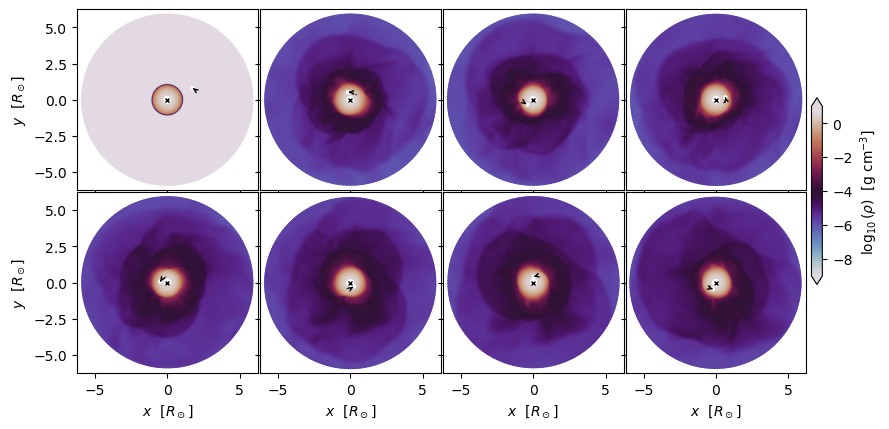

In [8]:
base_dir = '../../data/planetary_engulfment_test5/'
fig_mm = 1/25.4 #figure size
Porb = 10000   # ? orbit period time
orb = ou.read_trackfile(base_dir+"pm_trackfile.dat")
sel = (orb['time']>75000) & (orb['time']<95000)    
tperi = orb[sel]['time'][ np.argmin(orb[sel]['sep']) ]
print('tperi = ',tperi)

filelist = [base_dir + "PEGM.out1.00010.athdf",
            base_dir + "PEGM.out1.00145.athdf",
           base_dir + "PEGM.out1.00150.athdf",
           base_dir + "PEGM.out1.00155.athdf",
           base_dir + "PEGM.out1.00160.athdf",
           base_dir + "PEGM.out1.00165.athdf",
           base_dir + "PEGM.out1.00170.athdf",
           base_dir + "PEGM.out1.00175.athdf"]

thind = 0
mylevel = None
x2slicevalue=ou.get_midplane_theta(filelist[0],level=mylevel)

#fig,ax = plt.subplots(nrows=2,ncols=2,figsize=(13,7.9),
#                      sharey=True,sharex=True)
fig = plt.figure(figsize=(360*fig_mm,120*fig_mm))
grid = ImageGrid(fig,111,nrows_ncols=[2,4],
                 cbar_location="right",
                 cbar_mode="single",
                 cbar_size='3%',
                 cbar_pad=0.05)


r0thresh = 0.

def add_arrow(line, position=None, direction='right', size=15, color=None):
    """
    add an arrow to a line.

    line:       Line2D object
    position:   x-position of the arrow. If None, mean of xdata is taken
    direction:  'left' or 'right'
    size:       size of the arrow in fontsize points
    color:      if None, line color is taken.
    """
    line = line[0]
    if color is None:
        color = line.get_color()

    xdata = line.get_xdata()
    ydata = line.get_ydata()

    if position is None:
        position = xdata[-2] #xdata.mean()
    # find closest index
    start_ind = np.argmin(np.absolute(xdata - position))
    if direction == 'right':
        end_ind = start_ind + 1
    else:
        end_ind = start_ind - 1

    line.axes.annotate('',
        xytext=(xdata[start_ind], ydata[start_ind]),
        xy=(xdata[end_ind], ydata[end_ind]),
        arrowprops=dict(arrowstyle="->", color=color),
        size=size
    )

    


for i,myfile in enumerate(filelist):
    d = ou.read_data(myfile,orb,gamma=1.66667,level=mylevel,x2_min=x2slicevalue,x2_max=x2slicevalue,
                       get_energy=False,profile_file=base_dir+'polytrope.dat')

    x2,y2,z2 = ou.pos_secondary(orb,d['Time'])

    rcom,vcom = ou.rcom_vcom(orb,d['Time'])
    
    
    ### DENSITY
    im=grid[i].pcolormesh( ou.get_plot_array_midplane(d['x'][:,thind,:]-rcom[0])/c.rsun, 
                           ou.get_plot_array_midplane(d['y'][:,thind,:] -rcom[1])/c.rsun,
                           ou.get_plot_array_midplane(np.where(d['r0'][:,thind,:]>r0thresh, np.log10((d['r0']*d['rho'])[:,thind,:]),np.nan ) ),
               cmap='twilight',vmin=-9,vmax=1,shading='gouraud',rasterized=True,zorder=0
            )
    #cb=grid.cbar_axes[0].colorbar(im,extend='both')
    cb=plt.colorbar(im,extend='both',cax=grid.cbar_axes[0],label=r'$\log_{10}\left( \rho \right)$  [g cm$^{-3}$]')
    #cb.set_label_text(r'$\log_{10}\left( \rho \right)$  [g cm$^{-3}$]')
    cb.solids.set_edgecolor('face')
    
    grid[i].annotate(r"$t-t_{\rm p}=$"+str(round((d['Time']-tperi)/86400.,1))+"d", (100,80),fontsize=7)
    
    grid[i].add_patch(plt.Circle([(x2-rcom[0])/c.rsun,(y2-rcom[1])/c.rsun],radius=0.1,color='white') )
        #grid[i].plot((x2-rcom[0])/c.rsun,(y2-rcom[1])/c.rsun,'wo',markersize=12,zorder=1,markeredgecolor='k')
    grid[i].set_ylim(-4*1.0865e11/c.rsun,4*1.0865e11/c.rsun)
    grid[i].set_xlim(-4*1.0865e11/c.rsun,4*1.0865e11/c.rsun)
    sel = (orb['time']>d['Time']-Porb/10) & (orb['time']<=d['Time'])
    l2 = grid[i].plot((orb[sel]['x']-orb[sel]['xcom'])/c.rsun,(orb[sel]['y']-orb[sel]['ycom'])/c.rsun,'k--',lw=0.5)
    #l1 = grid[i].plot(-orb[sel]['xcom']/c.rsun,-orb[sel]['ycom']/c.rsun,'k:',lw=0.5)
    grid[i].plot([0],[0],'kx',markersize=3)
    add_arrow(l2,size=6)
    #add_arrow(l1,size=6)
    grid[i].set_xlabel('$x \ \ [R_\odot]$')
    grid[i].set_ylabel('$y \ \ [R_\odot]$')
    


reading orbit file for binary simulation...
tperi =  93600.03
read_data...reading file ../../data/planetary_engulfment_test2/PEGM.out1.00180.athdf
 ...file read, constructing arrays
 ...gamma= 1.66667
...getting cartesian arrays...
read_data...reading file ../../data/planetary_engulfment_test2/PEGM.out1.00185.athdf
 ...file read, constructing arrays
 ...gamma= 1.66667
...getting cartesian arrays...
read_data...reading file ../../data/planetary_engulfment_test2/PEGM.out1.00190.athdf
 ...file read, constructing arrays
 ...gamma= 1.66667
...getting cartesian arrays...
read_data...reading file ../../data/planetary_engulfment_test2/PEGM.out1.00195.athdf
 ...file read, constructing arrays
 ...gamma= 1.66667
...getting cartesian arrays...
read_data...reading file ../../data/planetary_engulfment_test2/PEGM.out1.00200.athdf
 ...file read, constructing arrays
 ...gamma= 1.66667
...getting cartesian arrays...
read_data...reading file ../../data/planetary_engulfment_test2/PEGM.out1.00205.athdf
 ..

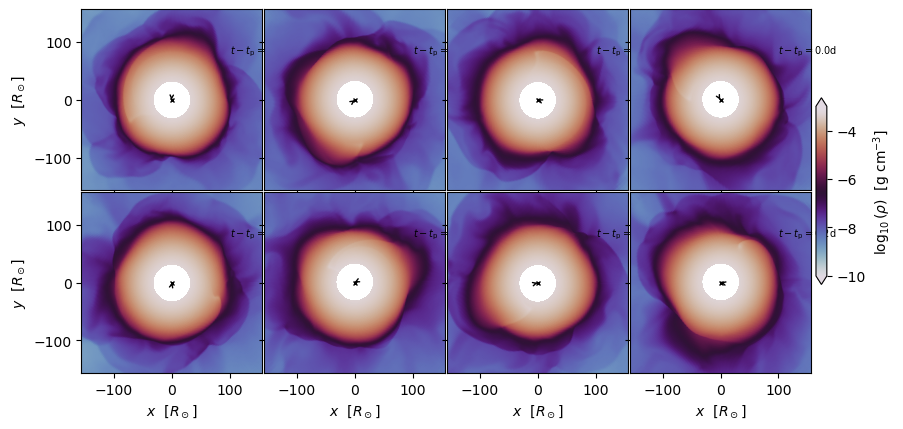

In [6]:
############
#rescale
rescale_factor = 100
############

base_dir = '../../data/planetary_engulfment_test2/'
fig_mm = 1/25.4 #figure size
Porb = 10000   # ? orbit period time
orb = ou.read_trackfile(base_dir+"pm_trackfile.dat")
sel = (orb['time']>75000) & (orb['time']<95000)    
tperi = orb[sel]['time'][ np.argmin(orb[sel]['sep']) ]
print('tperi = ',tperi)

filelist = [base_dir + "PEGM.out1.00180.athdf",
            base_dir + "PEGM.out1.00185.athdf",
           base_dir + "PEGM.out1.00190.athdf",
           base_dir + "PEGM.out1.00195.athdf",
           base_dir + "PEGM.out1.00200.athdf",
           base_dir + "PEGM.out1.00205.athdf",
           base_dir + "PEGM.out1.00210.athdf",
           base_dir + "PEGM.out1.00215.athdf"]

thind = 0
mylevel = None
x2slicevalue=ou.get_midplane_theta(filelist[0],level=mylevel)

#fig,ax = plt.subplots(nrows=2,ncols=2,figsize=(13,7.9),
#                      sharey=True,sharex=True)
fig = plt.figure(figsize=(360*fig_mm,120*fig_mm))
grid = ImageGrid(fig,111,nrows_ncols=[2,4],
                 cbar_location="right",
                 cbar_mode="single",
                 cbar_size='3%',
                 cbar_pad=0.05)


r0thresh = 0.

def add_arrow(line, position=None, direction='right', size=15, color=None):
    """
    add an arrow to a line.

    line:       Line2D object
    position:   x-position of the arrow. If None, mean of xdata is taken
    direction:  'left' or 'right'
    size:       size of the arrow in fontsize points
    color:      if None, line color is taken.
    """
    line = line[0]
    if color is None:
        color = line.get_color()

    xdata = line.get_xdata()
    ydata = line.get_ydata()

    if position is None:
        position = xdata[-2] #xdata.mean()
    # find closest index
    start_ind = np.argmin(np.absolute(xdata - position))
    if direction == 'right':
        end_ind = start_ind + 1
    else:
        end_ind = start_ind - 1

    line.axes.annotate('',
        xytext=(xdata[start_ind], ydata[start_ind]),
        xy=(xdata[end_ind], ydata[end_ind]),
        arrowprops=dict(arrowstyle="->", color=color),
        size=size
    )

    


for i,myfile in enumerate(filelist):
    d = ou.read_data(myfile,orb,gamma=1.66667,level=mylevel,x2_min=x2slicevalue,x2_max=x2slicevalue,
                       get_energy=False,profile_file=base_dir+'polytrope.dat')

    x2,y2,z2 = ou.pos_secondary(orb,d['Time'])

    rcom,vcom = ou.rcom_vcom(orb,d['Time'])
    
    
    ### DENSITY
    im=grid[i].pcolormesh( ou.get_plot_array_midplane(d['x'][:,thind,:]-rcom[0])/c.rsun*rescale_factor,
                           ou.get_plot_array_midplane(d['y'][:,thind,:] -rcom[1])/c.rsun*rescale_factor,
                           ou.get_plot_array_midplane(np.where(d['r0'][:,thind,:]>r0thresh, np.log10((d['r0']*d['rho']/rescale_factor**2)[:,thind,:]),np.nan ) ),
               cmap='twilight',vmin=-10,vmax=-3,shading='gouraud',rasterized=True,zorder=0
            )
    #cb=grid.cbar_axes[0].colorbar(im,extend='both')
    cb=plt.colorbar(im,extend='both',cax=grid.cbar_axes[0],label=r'$\log_{10}\left( \rho \right)$  [g cm$^{-3}$]')
    #cb.set_label_text(r'$\log_{10}\left( \rho \right)$  [g cm$^{-3}$]')
    cb.solids.set_edgecolor('face')
    
    grid[i].annotate(r"$t-t_{\rm p}=$"+str(round((d['Time']-tperi)/86400.,1))+"d", (100,80),fontsize=7)
    
    grid[i].add_patch(plt.Circle([(x2-rcom[0])/c.rsun,(y2-rcom[1])/c.rsun],radius=0.1,color='white') )
        #grid[i].plot((x2-rcom[0])/c.rsun,(y2-rcom[1])/c.rsun,'wo',markersize=12,zorder=1,markeredgecolor='k')
    grid[i].set_ylim(-1.0865e11*rescale_factor/c.rsun,1.0865e11*rescale_factor/c.rsun)
    grid[i].set_xlim(-1.0865e11*rescale_factor/c.rsun,1.0865e11*rescale_factor/c.rsun)
    sel = (orb['time']>d['Time']-Porb/10) & (orb['time']<=d['Time'])
    l2 = grid[i].plot((orb[sel]['x']-orb[sel]['xcom'])/c.rsun,(orb[sel]['y']-orb[sel]['ycom'])/c.rsun,'k--',lw=0.5)
    #l1 = grid[i].plot(-orb[sel]['xcom']/c.rsun,-orb[sel]['ycom']/c.rsun,'k:',lw=0.5)
    grid[i].plot([0],[0],'kx',markersize=3)
    add_arrow(l2,size=6)
    #add_arrow(l1,size=6)
    grid[i].set_xlabel('$x \ \ [R_\odot]$')
    grid[i].set_ylabel('$y \ \ [R_\odot]$')
    


reading orbit file for binary simulation...
tperi =  93600.03
read_data...reading file ../../data/planetary_engulfment_test2/PEGM.out1.00010.athdf
 ...file read, constructing arrays
 ...gamma= 1.66667
...getting cartesian arrays...
read_data...reading file ../../data/planetary_engulfment_test2/PEGM.out1.00185.athdf
 ...file read, constructing arrays
 ...gamma= 1.66667
...getting cartesian arrays...
read_data...reading file ../../data/planetary_engulfment_test2/PEGM.out1.00190.athdf
 ...file read, constructing arrays
 ...gamma= 1.66667
...getting cartesian arrays...
read_data...reading file ../../data/planetary_engulfment_test2/PEGM.out1.00195.athdf
 ...file read, constructing arrays
 ...gamma= 1.66667
...getting cartesian arrays...
read_data...reading file ../../data/planetary_engulfment_test2/PEGM.out1.00200.athdf
 ...file read, constructing arrays
 ...gamma= 1.66667
...getting cartesian arrays...
read_data...reading file ../../data/planetary_engulfment_test2/PEGM.out1.00205.athdf
 ..

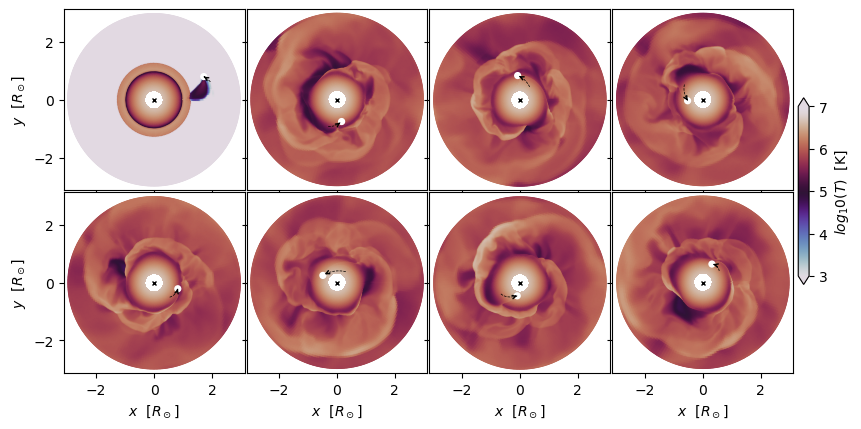

In [26]:
base_dir = '../../data/planetary_engulfment_test2/'
fig_mm = 1/25.4 #figure size
Porb = 10000   # ? orbit period time
orb = ou.read_trackfile(base_dir+"pm_trackfile.dat")
sel = (orb['time']>75000) & (orb['time']<95000)    
tperi = orb[sel]['time'][ np.argmin(orb[sel]['sep']) ]
print('tperi = ',tperi)

filelist = [base_dir + "PEGM.out1.00010.athdf",
            base_dir + "PEGM.out1.00185.athdf",
           base_dir + "PEGM.out1.00190.athdf",
           base_dir + "PEGM.out1.00195.athdf",
           base_dir + "PEGM.out1.00200.athdf",
           base_dir + "PEGM.out1.00205.athdf",
           base_dir + "PEGM.out1.00210.athdf",
           base_dir + "PEGM.out1.00215.athdf"]

thind = 0
mylevel = None
x2slicevalue=ou.get_midplane_theta(filelist[0],level=mylevel)

#fig,ax = plt.subplots(nrows=2,ncols=2,figsize=(13,7.9),
#                      sharey=True,sharex=True)
fig = plt.figure(figsize=(360*fig_mm,120*fig_mm))
grid = ImageGrid(fig,111,nrows_ncols=[2,4],
                 cbar_location="right",
                 cbar_mode="single",
                 cbar_size='3%',
                 cbar_pad=0.05)


r0thresh = 0.

def add_arrow(line, position=None, direction='right', size=15, color=None):
    """
    add an arrow to a line.

    line:       Line2D object
    position:   x-position of the arrow. If None, mean of xdata is taken
    direction:  'left' or 'right'
    size:       size of the arrow in fontsize points
    color:      if None, line color is taken.
    """
    line = line[0]
    if color is None:
        color = line.get_color()

    xdata = line.get_xdata()
    ydata = line.get_ydata()

    if position is None:
        position = xdata[-2] #xdata.mean()
    # find closest index
    start_ind = np.argmin(np.absolute(xdata - position))
    if direction == 'right':
        end_ind = start_ind + 1
    else:
        end_ind = start_ind - 1

    line.axes.annotate('',
        xytext=(xdata[start_ind], ydata[start_ind]),
        xy=(xdata[end_ind], ydata[end_ind]),
        arrowprops=dict(arrowstyle="->", color=color),
        size=size
    )

    


for i,myfile in enumerate(filelist):
    d = ou.read_data(myfile,orb,gamma=1.66667,level=mylevel,x2_min=x2slicevalue,x2_max=x2slicevalue,
                       get_energy=False,profile_file=base_dir+'polytrope.dat')

    x2,y2,z2 = ou.pos_secondary(orb,d['Time'])

    rcom,vcom = ou.rcom_vcom(orb,d['Time'])
    
    
    ### TEMPERATURE
    temp = ou.get_plot_array_midplane(np.where(d['r0'][:,thind,:]>r0thresh,np.log10(((d['press']/d['rho']*c.mp/2/c.kB)[:,thind,:])),np.nan ) )
    im=grid[i].pcolormesh( ou.get_plot_array_midplane(d['x'][:,thind,:]-rcom[0])/c.rsun, 
                           ou.get_plot_array_midplane(d['y'][:,thind,:] -rcom[1])/c.rsun,
                           temp,
               cmap='twilight',vmin=3,vmax=7,shading='gouraud',rasterized=True,zorder=0
            )
    #cb=grid.cbar_axes[0].colorbar(im,extend='both')
    cb=plt.colorbar(im,extend='both',cax=grid.cbar_axes[0],label=r'$log_10\left(  T \right)$  [K]')
    #cb.set_label_text(r'$\log_{10}\left( \rho \right)$  [g cm$^{-3}$]')
    cb.solids.set_edgecolor('face')
    
    grid[i].annotate(r"$t-t_{\rm p}=$"+str(round((d['Time']-tperi)/86400.,1))+"d", (100,80),fontsize=7)
    
    grid[i].add_patch(plt.Circle([(x2-rcom[0])/c.rsun,(y2-rcom[1])/c.rsun],radius=0.1,color='white') )
        #grid[i].plot((x2-rcom[0])/c.rsun,(y2-rcom[1])/c.rsun,'wo',markersize=12,zorder=1,markeredgecolor='k')
    grid[i].set_ylim(-2*1.0865e11/c.rsun,2*1.0865e11/c.rsun)
    grid[i].set_xlim(-2*1.0865e11/c.rsun,2*1.0865e11/c.rsun)
    sel = (orb['time']>d['Time']-Porb/10) & (orb['time']<=d['Time'])
    l2 = grid[i].plot((orb[sel]['x']-orb[sel]['xcom'])/c.rsun,(orb[sel]['y']-orb[sel]['ycom'])/c.rsun,'k--',lw=0.5)
    #l1 = grid[i].plot(-orb[sel]['xcom']/c.rsun,-orb[sel]['ycom']/c.rsun,'k:',lw=0.5)
    grid[i].plot([0],[0],'kx',markersize=3)
    add_arrow(l2,size=6)
    #add_arrow(l1,size=6)
    grid[i].set_xlabel('$x \ \ [R_\odot]$')
    grid[i].set_ylabel('$y \ \ [R_\odot]$')
    


reading orbit file for binary simulation...
tperi =  88519.24
read_data...reading file ../../data/planetary_engulfment_test5/PEGM.out1.00010.athdf
 ...file read, constructing arrays
 ...gamma= 1.66667
...getting cartesian arrays...
read_data...reading file ../../data/planetary_engulfment_test5/PEGM.out1.00145.athdf
 ...file read, constructing arrays
 ...gamma= 1.66667
...getting cartesian arrays...
read_data...reading file ../../data/planetary_engulfment_test5/PEGM.out1.00150.athdf
 ...file read, constructing arrays
 ...gamma= 1.66667
...getting cartesian arrays...
read_data...reading file ../../data/planetary_engulfment_test5/PEGM.out1.00155.athdf
 ...file read, constructing arrays
 ...gamma= 1.66667
...getting cartesian arrays...
read_data...reading file ../../data/planetary_engulfment_test5/PEGM.out1.00160.athdf
 ...file read, constructing arrays
 ...gamma= 1.66667
...getting cartesian arrays...
read_data...reading file ../../data/planetary_engulfment_test5/PEGM.out1.00165.athdf
 ..

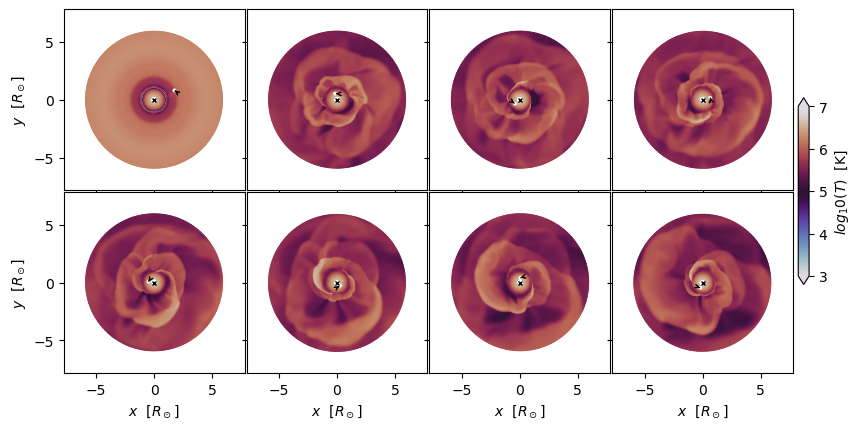

In [6]:
base_dir = '../../data/planetary_engulfment_test5/'
fig_mm = 1/25.4 #figure size
Porb = 10000   # ? orbit period time
orb = ou.read_trackfile(base_dir+"pm_trackfile.dat")
sel = (orb['time']>75000) & (orb['time']<95000)    
tperi = orb[sel]['time'][ np.argmin(orb[sel]['sep']) ]
print('tperi = ',tperi)

filelist = [base_dir + "PEGM.out1.00010.athdf",
            base_dir + "PEGM.out1.00145.athdf",
           base_dir + "PEGM.out1.00150.athdf",
           base_dir + "PEGM.out1.00155.athdf",
           base_dir + "PEGM.out1.00160.athdf",
           base_dir + "PEGM.out1.00165.athdf",
           base_dir + "PEGM.out1.00170.athdf",
           base_dir + "PEGM.out1.00175.athdf"]

thind = 0
mylevel = None
x2slicevalue=ou.get_midplane_theta(filelist[0],level=mylevel)

#fig,ax = plt.subplots(nrows=2,ncols=2,figsize=(13,7.9),
#                      sharey=True,sharex=True)
fig = plt.figure(figsize=(360*fig_mm,120*fig_mm))
grid = ImageGrid(fig,111,nrows_ncols=[2,4],
                 cbar_location="right",
                 cbar_mode="single",
                 cbar_size='3%',
                 cbar_pad=0.05)


r0thresh = 0.

def add_arrow(line, position=None, direction='right', size=15, color=None):
    """
    add an arrow to a line.

    line:       Line2D object
    position:   x-position of the arrow. If None, mean of xdata is taken
    direction:  'left' or 'right'
    size:       size of the arrow in fontsize points
    color:      if None, line color is taken.
    """
    line = line[0]
    if color is None:
        color = line.get_color()

    xdata = line.get_xdata()
    ydata = line.get_ydata()

    if position is None:
        position = xdata[-2] #xdata.mean()
    # find closest index
    start_ind = np.argmin(np.absolute(xdata - position))
    if direction == 'right':
        end_ind = start_ind + 1
    else:
        end_ind = start_ind - 1

    line.axes.annotate('',
        xytext=(xdata[start_ind], ydata[start_ind]),
        xy=(xdata[end_ind], ydata[end_ind]),
        arrowprops=dict(arrowstyle="->", color=color),
        size=size
    )

    


for i,myfile in enumerate(filelist):
    d = ou.read_data(myfile,orb,gamma=1.66667,level=mylevel,x2_min=x2slicevalue,x2_max=x2slicevalue,
                       get_energy=False,profile_file=base_dir+'polytrope.dat')

    x2,y2,z2 = ou.pos_secondary(orb,d['Time'])

    rcom,vcom = ou.rcom_vcom(orb,d['Time'])
    
    
    ### TEMPERATURE
    temp = ou.get_plot_array_midplane(np.where(d['r0'][:,thind,:]>r0thresh,np.log10(((d['press']/d['rho']*c.mp/2/c.kB)[:,thind,:])),np.nan ) )
    im=grid[i].pcolormesh( ou.get_plot_array_midplane(d['x'][:,thind,:]-rcom[0])/c.rsun, 
                           ou.get_plot_array_midplane(d['y'][:,thind,:] -rcom[1])/c.rsun,
                           temp,
               cmap='twilight',vmin=3,vmax=7,shading='gouraud',rasterized=True,zorder=0
            )
    #cb=grid.cbar_axes[0].colorbar(im,extend='both')
    cb=plt.colorbar(im,extend='both',cax=grid.cbar_axes[0],label=r'$log_10\left(  T \right)$  [K]')
    #cb.set_label_text(r'$\log_{10}\left( \rho \right)$  [g cm$^{-3}$]')
    cb.solids.set_edgecolor('face')
    
    grid[i].annotate(r"$t-t_{\rm p}=$"+str(round((d['Time']-tperi)/86400.,1))+"d", (100,80),fontsize=7)
    
    grid[i].add_patch(plt.Circle([(x2-rcom[0])/c.rsun,(y2-rcom[1])/c.rsun],radius=0.1,color='white') )
        #grid[i].plot((x2-rcom[0])/c.rsun,(y2-rcom[1])/c.rsun,'wo',markersize=12,zorder=1,markeredgecolor='k')
    grid[i].set_ylim(-5*1.0865e11/c.rsun,5*1.0865e11/c.rsun)
    grid[i].set_xlim(-5*1.0865e11/c.rsun,5*1.0865e11/c.rsun)
    sel = (orb['time']>d['Time']-Porb/10) & (orb['time']<=d['Time'])
    l2 = grid[i].plot((orb[sel]['x']-orb[sel]['xcom'])/c.rsun,(orb[sel]['y']-orb[sel]['ycom'])/c.rsun,'k--',lw=0.5)
    #l1 = grid[i].plot(-orb[sel]['xcom']/c.rsun,-orb[sel]['ycom']/c.rsun,'k:',lw=0.5)
    grid[i].plot([0],[0],'kx',markersize=3)
    add_arrow(l2,size=6)
    #add_arrow(l1,size=6)
    grid[i].set_xlabel('$x \ \ [R_\odot]$')
    grid[i].set_ylabel('$y \ \ [R_\odot]$')
    


reading orbit file for binary simulation...
tperi =  93600.03
read_data...reading file ../../data/planetary_engulfment_test2/PEGM.out1.00010.athdf
 ...file read, constructing arrays
 ...gamma= 1.66667
...getting cartesian arrays...
read_data...reading file ../../data/planetary_engulfment_test2/PEGM.out1.00185.athdf
 ...file read, constructing arrays
 ...gamma= 1.66667
...getting cartesian arrays...
read_data...reading file ../../data/planetary_engulfment_test2/PEGM.out1.00190.athdf
 ...file read, constructing arrays
 ...gamma= 1.66667
...getting cartesian arrays...
read_data...reading file ../../data/planetary_engulfment_test2/PEGM.out1.00195.athdf
 ...file read, constructing arrays
 ...gamma= 1.66667
...getting cartesian arrays...
read_data...reading file ../../data/planetary_engulfment_test2/PEGM.out1.00200.athdf
 ...file read, constructing arrays
 ...gamma= 1.66667
...getting cartesian arrays...
read_data...reading file ../../data/planetary_engulfment_test2/PEGM.out1.00205.athdf
 ..

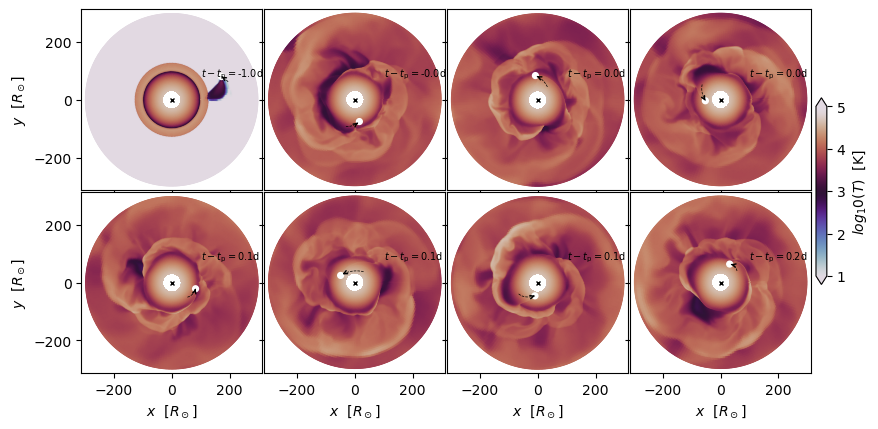

In [14]:
############
#rescale
rescale_factor = 100
############

base_dir = '../../data/planetary_engulfment_test2/'
fig_mm = 1/25.4 #figure size
Porb = 10000   # ? orbit period time
orb = ou.read_trackfile(base_dir+"pm_trackfile.dat")
sel = (orb['time']>75000) & (orb['time']<95000)    
tperi = orb[sel]['time'][ np.argmin(orb[sel]['sep']) ]
print('tperi = ',tperi)

filelist = [base_dir + "PEGM.out1.00010.athdf",
            base_dir + "PEGM.out1.00185.athdf",
           base_dir + "PEGM.out1.00190.athdf",
           base_dir + "PEGM.out1.00195.athdf",
           base_dir + "PEGM.out1.00200.athdf",
           base_dir + "PEGM.out1.00205.athdf",
           base_dir + "PEGM.out1.00210.athdf",
           base_dir + "PEGM.out1.00215.athdf"]

thind = 0
mylevel = None
x2slicevalue=ou.get_midplane_theta(filelist[0],level=mylevel)

#fig,ax = plt.subplots(nrows=2,ncols=2,figsize=(13,7.9),
#                      sharey=True,sharex=True)
fig = plt.figure(figsize=(360*fig_mm,120*fig_mm))
grid = ImageGrid(fig,111,nrows_ncols=[2,4],
                 cbar_location="right",
                 cbar_mode="single",
                 cbar_size='3%',
                 cbar_pad=0.05)


r0thresh = 0.

def add_arrow(line, position=None, direction='right', size=15, color=None):
    """
    add an arrow to a line.

    line:       Line2D object
    position:   x-position of the arrow. If None, mean of xdata is taken
    direction:  'left' or 'right'
    size:       size of the arrow in fontsize points
    color:      if None, line color is taken.
    """
    line = line[0]
    if color is None:
        color = line.get_color()

    xdata = line.get_xdata()
    ydata = line.get_ydata()

    if position is None:
        position = xdata[-2] #xdata.mean()
    # find closest index
    start_ind = np.argmin(np.absolute(xdata - position))
    if direction == 'right':
        end_ind = start_ind + 1
    else:
        end_ind = start_ind - 1

    line.axes.annotate('',
        xytext=(xdata[start_ind], ydata[start_ind]),
        xy=(xdata[end_ind], ydata[end_ind]),
        arrowprops=dict(arrowstyle="->", color=color),
        size=size
    )

    


for i,myfile in enumerate(filelist):
    d = ou.read_data(myfile,orb,gamma=1.66667,level=mylevel,x2_min=x2slicevalue,x2_max=x2slicevalue,
                       get_energy=False,profile_file=base_dir+'polytrope.dat')

    x2,y2,z2 = ou.pos_secondary(orb,d['Time'])

    rcom,vcom = ou.rcom_vcom(orb,d['Time'])
    
    
    ### TEMPERATURE
    temp = ou.get_plot_array_midplane(np.where(d['r0'][:,thind,:]>r0thresh,np.log10(((d['press']/d['rho']*c.mp/2/c.kB/rescale_factor)[:,thind,:])),np.nan ) )
    im=grid[i].pcolormesh( ou.get_plot_array_midplane(d['x'][:,thind,:]-rcom[0])/c.rsun*rescale_factor, 
                           ou.get_plot_array_midplane(d['y'][:,thind,:] -rcom[1])/c.rsun*rescale_factor,
                           temp,
               cmap='twilight',vmin=1,vmax=5,shading='gouraud',rasterized=True,zorder=0
            )
    #cb=grid.cbar_axes[0].colorbar(im,extend='both')
    cb=plt.colorbar(im,extend='both',cax=grid.cbar_axes[0],label=r'$log_10\left(  T \right)$  [K]')
    #cb.set_label_text(r'$\log_{10}\left( \rho \right)$  [g cm$^{-3}$]')
    cb.solids.set_edgecolor('face')
    
    grid[i].annotate(r"$t-t_{\rm p}=$"+str(round((d['Time']-tperi)/86400.,1))+"d", (100,80),fontsize=7)
    grid[i].add_patch(plt.Circle([(x2-rcom[0])*rescale_factor/c.rsun,(y2-rcom[1])*rescale_factor/c.rsun],radius=0.1*rescale_factor,color='white') )
        #grid[i].plot((x2-rcom[0])/c.rsun,(y2-rcom[1])/c.rsun,'wo',markersize=12,zorder=1,markeredgecolor='k')
    grid[i].set_ylim(-2*1.0865e11*rescale_factor/c.rsun,2*1.0865e11*rescale_factor/c.rsun)
    grid[i].set_xlim(-2*1.0865e11*rescale_factor/c.rsun,2*1.0865e11*rescale_factor/c.rsun)
    sel = (orb['time']>d['Time']-Porb/10) & (orb['time']<=d['Time'])
    l2 = grid[i].plot((orb[sel]['x']-orb[sel]['xcom'])*rescale_factor/c.rsun,(orb[sel]['y']-orb[sel]['ycom'])*rescale_factor/c.rsun,'k--',lw=0.5)
    #l1 = grid[i].plot(-orb[sel]['xcom']/c.rsun,-orb[sel]['ycom']/c.rsun,'k:',lw=0.5)
    grid[i].plot([0],[0],'kx',markersize=3)
    add_arrow(l2,size=6)
    #add_arrow(l1,size=6)
    grid[i].set_xlabel('$x \ \ [R_\odot]$')
    grid[i].set_ylabel('$y \ \ [R_\odot]$')
    


In [1]:
def get_interp_function(d,var,rescale_factor=1,method='linear'):
    """
    MM: Use RegularGridInterpolator to pass data to interpolating function for a given variable
    Parameters
    -----------
    d : dict
       athena data dict from read_data
    var: str
       name of variable to be interpolated
       
    Returns
    --------
    var_interp: an interpolating function that can be called with a tuple (phi,theta,r)
    """
    dph = np.gradient(d['x3v'])[0]
    dtheta = np.gradient(d['x2v'])[0]
    two_pi = ( (d['x3v'][-1]-d['x3v'][0]+dph) /(2*np.pi) > 0.99 ) # boolean to determine if spans 2pi in phi
    x1v = d['x1v']*rescale_factor
    
    if two_pi:
        x3v = np.append(d['x3v'][0]-dph,d['x3v'])
        x3v = np.append(x3v,x3v[-1]+dph)
        var_data = np.append([d[var][-1]],d[var],axis=0)
        var_data = np.append(var_data,[var_data[0]],axis=0)
    else:
        x3v = d['x3v']
        var_data = d[var]
        
    # extend in theta
    x2v = np.append(d['x2v'][0]-dtheta,d['x2v'])
    x2v = np.append(x2v,x2v[-1]+dtheta)
        
    var_interp = RegularGridInterpolator((x3v,d['x2v'],x1v),var_data,bounds_error=False,method=method)
    return var_interp

def cart_to_polar(x,y,z):
    """cartesian->polar conversion (matches 0<phi<2pi convention of Athena++)
    Parameters
    x, y, z
    Returns
    r, th, phi
    """
    r = np.sqrt(x**2 + y**2 +z**2)
    th = np.arccos(z/r)
    phi = np.arctan2(y,x)
    phi = np.where(phi>=0,phi,phi+2*np.pi)
    return np.stack((r, th, phi), axis=2)

def mesh_interpolate_at_xyzpoints(d,var,points):
    """
    MM: convience function to interpolate a variable to mesh points
    Parameters
    -----------
    d: athena++ data dict
    var: str variable name in, e.g. "rho"
    points: array of cartesian positions (eg vertices or centroids) (n,n,3) floats (x,y,z)
    """
    var_interp = get_interp_function(d,var)
    rp,thp,php = cart_to_polar(points[:,:,0],points[:,:,1],points[:,:,2])
    return var_interp( (php,thp,rp) )

In [ ]:
Rosseland_mean_opacity(1e-5)

In [1]:
### integrate along radius from every solid angle
base_dir = '../../data/planetary_engulfment_test2/'
orb = ou.read_trackfile(base_dir+"pm_trackfile.dat")
mylevel = None

# considering Hydrogen and ff opacity
def ff_opacity(rho, temp, wavelength):
    # in cgs unit
    opacity = 4.97*rho**2/temp**0.5*wavelength**3*1000
    return opacity

def Rosseland_mean_opacity(rho,temp):
    # in cgs unit
    opacity = 1.7e-25*temp**(-7/2)*rho**2/c.mp**2
    return opacity


def observer_grid(n, box_half_length = 1.0865e11, method = 'uniform',direction ='z'):
    #n*n*3 rectangle gird
    
    if method == 'uniform':
        obs_grid_xx = box_half_length*np.ones((n,n))
        pos_yy = np.linspace(-box_half_length, box_half_length, n)
        pos_zz = pos_yy
        obs_grid_yy,obs_grid_zz = np.meshgrid(pos_yy, pos_zz)
        
        if direction == 'x':
            obs_grid = np.stack((obs_grid_xx, obs_grid_yy, obs_grid_zz), axis=2)
            
        if direction == 'z':
            obs_grid = np.stack((obs_grid_yy, obs_grid_zz, obs_grid_xx), axis=2)
            
        if direction == 'y':
            obs_grid = np.stack((obs_grid_yy, obs_grid_xx, obs_grid_zz), axis=2)
    return obs_grid

def optical_depth(data, wavelength, obs_grid, rescale_factor=1, dx = -1, direction = 'x',plot = True):
    """Marching the obs_grid along given direction to find the photo-spheric position
    
    Parameters:
    -------
    data: athena++ data dict
    wavelength: observer wavelength in nm
    obs_grid: observer grid, (n,n) matrix
    direction: observer direction: 'x','y','z'; all from positive axis to negtive
    
    Returns: (n,n,3) array with photo-spheric position in cartesian coordinates, found with coordinate<9*domain_size, not found with
    coordinate=10*domain size
    """
    
    ## initializition
    n = len(obs_grid)
    op_dep = np.zeros((n,n))
    marching_box_xyz = obs_grid.copy()
    light_length = np.zeros((n,n))
    
    
    # computitional domain size
    domain_size = np.max(obs_grid)
    #print(domain_size)
    cell_size = domain_size/(n-1)*2
    area = cell_size**2
    pho_position = np.ones((n,n,3))*domain_size*10
    
    ## get interpolation function
    rho_star = data['rho']*data['r0']/rescale_factor**2
    rho_star_dict = {'rho_star':rho_star}
    data.update(rho_star_dict)
    interp_rho = get_interp_function(data,'rho_star',rescale_factor=rescale_factor)
    temp = data['press']/data['rho']*c.mp/2/c.kB/rescale_factor
    temp_dict = {'temp':temp}
    data.update(temp_dict)
    interp_temp = get_interp_function(data,'temp',rescale_factor=rescale_factor)
    if dx == -1:
        dx = cell_size/100
        
    if direction == 'x':
        marching_pos = np.min(marching_box_xyz[:,:,0])
    if direction == 'y':
        marching_pos = np.min(marching_box_xyz[:,:,1])
    if direction == 'z':
        marching_pos = np.min(marching_box_xyz[:,:,2])
        
    # use success matrix to determine if the line of sight is on the star,-1 for no, 1 for yes, 0 for first success
    success= -1*np.ones((n,n)) 
        
    #print('marching_pos', marching_pos)
    while marching_pos>-domain_size:
        # get density and temperature to get opacity
        marching_box_rtp = cart_to_polar(marching_box_xyz[:,:,0],marching_box_xyz[:,:,1],marching_box_xyz[:,:,2])
        rho_box = interp_rho((marching_box_rtp[:,:,2],marching_box_rtp[:,:,1],marching_box_rtp[:,:,0]))
        rho_box = np.where(np.isnan(rho_box), 10**10, rho_box)
        #print(rho_box)
        temp_box = interp_temp((marching_box_rtp[:,:,2],marching_box_rtp[:,:,1],marching_box_rtp[:,:,0]))
            
        # integral optical depth
        op_dep_new = op_dep + ff_opacity(rho_box,temp_box,wavelength)*dx
        #op_dep_new = op_dep + Rosseland_mean_opacity(rho_box,temp_box)*dx
        
        op_dep = np.where(op_dep>=1,op_dep,op_dep_new)
        #print(ff_opacity(rho_box,temp_box,wavelength))
        #print(temp_box)
        success = np.where(op_dep>=1,success+1,success)
            
        #if np.any(success== 0.):
            #print('success')

            
        # if first success, restore the success coordinates
        pho_position[:,:,0] = np.where(success == 0.,marching_box_xyz[:,:,0],pho_position[:,:,0])
        pho_position[:,:,1] = np.where(success == 0.,marching_box_xyz[:,:,1],pho_position[:,:,1])
        pho_position[:,:,2] = np.where(success == 0.,marching_box_xyz[:,:,2],pho_position[:,:,2])
                
            
        # marching
        marching_pos = marching_pos-dx
        if direction == 'x':
            marching_box_xyz[:,:,0] -= dx
        if direction == 'y':
            marching_box_xyz[:,:,1] -= dx
        if direction == 'z':
            marching_box_xyz[:,:,2] -= dx
            
        success = np.where(success>=1,1,success)
            
       
    # using the radius to say the photo-spheric radius at the surface or not(0.9R_S--1.1R_S)
    #pho_radius = (pho_position[:,:,0]**2+pho_position[:,:,1]**2+pho_position[:,:,2]**2)**0.5/c.rsun
    #pho_radius = np.where(pho_radius>10,0,pho_radius)
    # plot
    if plot: 
        pho_radius = (pho_position[:,:,0]**2+pho_position[:,:,1]**2+pho_position[:,:,2]**2)**0.5/c.rsun
        pho_radius = np.where(pho_radius>10*rescale_factor,0,pho_radius)
        if direction =='x':
            plt.imshow(pho_radius)
            plt.colorbar()  # Add a color bar to show the scale
            plt.title('Photosphere radius Plot')
            plt.xlabel('$y \ \ [R_\odot]$')
            plt.ylabel('$z \ \ [R_\odot]$')
            plt.show()
        if direction =='y':
            plt.imshow(pho_radius)
            plt.colorbar()  # Add a color bar to show the scale
            plt.title('Photosphere radius Plot')
            plt.xlabel('$x \ \ [R_\odot]$')
            plt.ylabel('$z \ \ [R_\odot]$')
            plt.show()
        if direction =='z':
            plt.imshow(pho_radius)
            plt.colorbar()  # Add a color bar to show the scale
            plt.title('Photosphere radius Plot')
            plt.xlabel('$x \ \ [R_\odot]$')
            plt.ylabel('$y \ \ [R_\odot]$')
            plt.show()
        
    return pho_position

def Blackbody(wavelength,temp):
    """
    Planck blackbody emission, in cgs units
    """
    a = 2*c.h*c.c**2
    b = c.h*c.c/(wavelength*1e-7)/c.kB/temp
    return a/(wavelength*1e-7)**5/(np.exp(b)-1.0)


def flux(data,pho_pos,grid,wavelength,rescale_factor=1,plot = True, direction ='z'):
    """
    Synthetic photometry, Planck blackbody emission flux
    """
    
    # using the radius to say the photo-spheric radius at the surface or not(0.9R_S--1.1R_S)
    pho_radius = (pho_pos[:,:,0]**2+pho_pos[:,:,1]**2+pho_pos[:,:,2]**2)**0.5/c.rsun
    pho_radius = np.where(pho_radius>10*rescale_factor,0,pho_radius)
    
    ## get interpolation function
    interp_rho = get_interp_function(data,'rho_star',rescale_factor=rescale_factor)
    interp_temp = get_interp_function(data,'temp',rescale_factor=rescale_factor)
    
    # computitional domain size
    domain_size = np.max(grid)
    n = len(grid)
    cell_size = domain_size/(n-1)*2
    area = cell_size**2
    
    # flux intensity 
    pho_pos_rtp = cart_to_polar(pho_pos[:,:,0],pho_pos[:,:,1],pho_pos[:,:,2])
    pho_temp = interp_temp((pho_pos_rtp[:,:,2],pho_pos_rtp[:,:,1],pho_pos_rtp[:,:,0]))
    #print(pho_temp)
    #print(interp_rho((pho_pos_rtp[:,:,2],pho_pos_rtp[:,:,1],pho_pos_rtp[:,:,0])))
    flux_intensity = Blackbody(wavelength, pho_temp)
    flux_intensity = np.where(pho_radius==0,0,flux_intensity)
    flux = flux_intensity*area
    
    #print(np.where(pho_temp>1e15,pho_radius,0))
    
    # plot
    if plot: 
        if direction =='x':
            plt.pcolor(grid[0,:,1]/c.rsun,grid[:,0,2]/c.rsun,flux, cmap='inferno')
            plt.colorbar()  # Add a color bar to show the scale
            plt.title('Flux Plot')
            plt.xlabel('$y \ \ [R_\odot]$')
            plt.ylabel('$z \ \ [R_\odot]$')
            plt.show()
        if direction =='y':
            plt.pcolor(grid[0,:,0]/c.rsun,grid[:,0,2]/c.rsun,flux, cmap='inferno')
            plt.colorbar()  # Add a color bar to show the scale
            plt.title('Flux Plot')
            plt.xlabel('$x \ \ [R_\odot]$')
            plt.ylabel('$z \ \ [R_\odot]$')
            plt.show()
        if direction =='z':
            plt.pcolor(grid[0,:,0]/c.rsun,grid[:,0,1]/c.rsun,flux, cmap='inferno')
            plt.colorbar()  # Add a color bar to show the scale
            plt.title('Flux Plot')
            plt.xlabel('$x \ \ [R_\odot]$')
            plt.ylabel('$y \ \ [R_\odot]$')
            plt.show()
        
    return flux

def integrated_luminosity(id_order):
    """
    Sum the flux to get integrated luminosity
    """
    # read data
    id_name = id_order+start_id
    datafile = dirname + "PEGM.out1."+str(id_name).zfill(5)+".athdf"
    data = ou.read_data(datafile,orb,gamma=1.66667,level=mylevel,
                    get_energy=False,profile_file=dirname+'polytrope.dat')
    time = data['Time']
        
    pho_pos = optical_depth(data,wavelength,ob_grid,direction=direction)
    flux_con = flux(data, pho_pos, ob_grid, wavelength,plot=False, direction=direction)
    int_lum = np.sum(flux_con)
    
    return int_lum, time
    
def light_curve(dirname, start_time, end_time, time_incre, wavelength, grid_size, plot = True, direction ='z'):
    """
    Temporal evolution of the integrated luminosity
    """
    
    # find data file by time and loop over files
    start_id = round(start_time/time_incre)-10
    end_id = round(end_time/time_incre)+10
    file_num = end_id-start_id+1
    
    lum_time = np.zeros(file_num)
    time = np.zeros(file_num)
    
    ob_grid=observer_grid(grid_size,direction=direction) # should be fixed
    
    #from multiprocessing import Pool
    
    #with Pool(64) as p:
        #lum_time, time=p.map(integrated_luminosity, id_order,start_id,dirname,orb,mylevel,wavelength,ob_grid,direction)
        
    
   #""" 
    # Non-parrallel
    for id_order in range(file_num):
        # read data
        id_name = id_order+start_id
        datafile = dirname + "PEGM.out1."+str(id_name).zfill(5)+".athdf"
        data = ou.read_data(datafile,orb,gamma=1.66667,level=mylevel,
                       get_energy=False,profile_file=base_dir+'polytrope.dat')
        time[id_order] = data['Time']
        
        pho_pos = optical_depth(data,wavelength,ob_grid,direction=direction)
        flux_con = flux(data, pho_pos, ob_grid, wavelength,plot=False, direction=direction)
        int_lum = np.sum(flux_con)
        lum_time[id_order] = int_lum
   # """
    
    if plot:
        plt.plot(time,lum_time)
        plt.title('Light Curve')
        plt.xlabel('$Time$')
        plt.ylabel('$Luminosity$')
        plt.show()

NameError: name 'ou' is not defined

/tmp/ipykernel_3670966/2211469075.py:168: RuntimeWarning: overflow encountered in exp
  return a/(wavelength*1e-7)**5/(np.exp(b)-1.0)


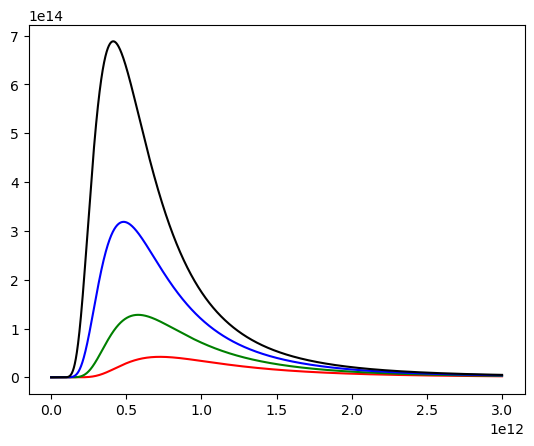

In [66]:
h = 6.626e-34
#c = 3.0e+8
k = 1.38e-23

def planck(wav, T):
    a = 2.0*h*c**2
    b = h*c/(wav*k*T)
    intensity = a/ ( (wav**5) * (np.exp(b) - 1.0) )
    return intensity

wavelengths = np.arange(1e-9, 3e-6, 1e-9)*1e9
# intensity at 4000K, 5000K, 6000K, 7000K

intensity4000 = Blackbody(wavelengths, 4000.)
intensity5000 = Blackbody(wavelengths, 5000.)
intensity6000 = Blackbody(wavelengths, 6000.)
intensity7000 = Blackbody(wavelengths, 7000.)
"""
intensity4000 = planck(wavelengths, 4000.)
intensity5000 = planck(wavelengths, 5000.)
intensity6000 = planck(wavelengths, 6000.)
intensity7000 = planck(wavelengths, 7000.)
"""
plt.plot(wavelengths*1e9, intensity4000, 'r-') 
# plot intensity4000 versus wavelength in nm as a red line
plt.plot(wavelengths*1e9, intensity5000, 'g-') # 5000K green line
plt.plot(wavelengths*1e9, intensity6000, 'b-') # 6000K blue line
plt.plot(wavelengths*1e9, intensity7000, 'k-') # 7000K black line

# show the plot
plt.show()

In [105]:
def light_curve_parallel(id_name, start_id, wavelength, grid_size, direction, time, int_lum):
    """
    Temporal evolution of the integrated luminosity(parallel execution)
    ----
    Argments: tuple of (id_name, wavelength, grid_size, direction)
    """
    
    base_dir = '../../data/planetary_engulfment_test2/'
    orb = ou.read_trackfile(base_dir+"pm_trackfile.dat")
    mylevel = None
    
    datafile = base_dir + "PEGM.out1."+str(id_name+start_id).zfill(5)+".athdf"
    data = ou.read_data(datafile,orb,gamma=1.66667,level=mylevel,
                get_energy=False,profile_file=base_dir+'polytrope.dat')
    
    ob_grid=observer_grid(grid_size,direction=direction)
    pho_pos = optical_depth(data,wavelength,ob_grid,plot=False,direction=direction)
    flux_con = flux(data, pho_pos, ob_grid, wavelength,plot=False, direction=direction)
    time[id_name] = data['Time']
    int_lum[id_name] = np.sum(flux_con)
    
def light_curve_parallel_plot(plot_num, start_id, wavelength, grid_size,direction = 'z'):
    """
    Use multiprocessing.Process to parallel execution
    """
    from multiprocessing import Pool,Array,Process,Manager
    
     
    p_list = []
    manager = Manager()
    time = manager.Array('d',np.arange(plot_num))
    int_lum = manager.Array('d',np.arange(plot_num))
     
    pool = Pool(20)
    for i in np.arange(plot_num):
        pool.apply_async(light_curve_parallel, args=(i,start_id,wavelength,grid_size,direction, time, int_lum))
    
    pool.close()
    pool.join()
    '''
    for i in np.arange(plot_num):
        p = Process(target = light_curve_parallel, args=(i,start_id,wavelength,grid_size,direction, time, int_lum))
        p.daemon=True
        p_list.append(p)
    
    for p in p_list:
        p.start()
    for p in p_list:
        p.join()
    '''
     
     
    plt.plot(np.array(time),np.array(int_lum))
    plt.title('Light Curve')
    plt.xlabel('$Time$')
    plt.ylabel('$Luminosity$')
    plt.show()

In [89]:
myfile = base_dir+"PEGM.out1.00200.athdf"

data = ou.read_data(myfile,orb,gamma=1.66667,level=mylevel,
                       get_energy=False,profile_file=base_dir+'polytrope.dat')



read_data...reading file ../../data/planetary_engulfment_test2/PEGM.out1.00200.athdf
 ...file read, constructing arrays
 ...gamma= 1.66667
...getting cartesian arrays...


In [112]:
############
#rescale
rescale_factor = 100
############
direction='z'
ob_grid=observer_grid(100,box_half_length = 1.0865e11*rescale_factor,direction=direction)


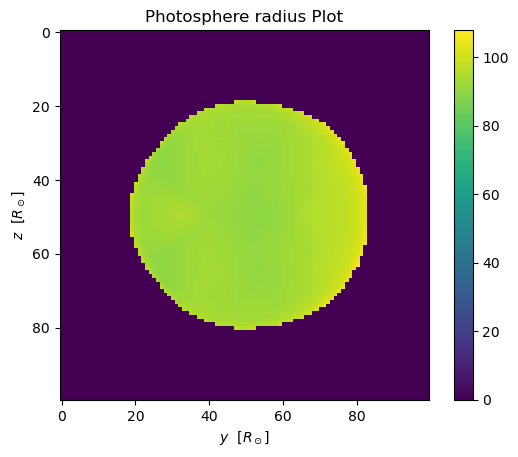

In [113]:
wavelength = 0.1
pho_pos = optical_depth(data,wavelength,ob_grid,rescale_factor=rescale_factor,direction=direction)
#print(np.max(pho_pos)/c.rsun)

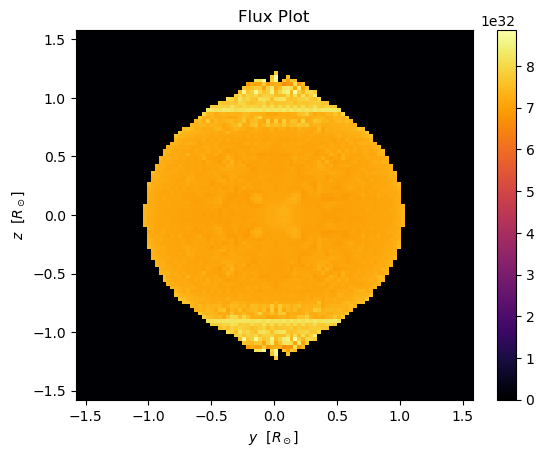

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [88]:
flux(data,pho_pos, ob_grid,wavelength,direction=direction)

reading orbit file for binary simulation...reading orbit file for binary simulation...reading orbit file for binary simulation...reading orbit file for binary simulation...
reading orbit file for binary simulation...reading orbit file for binary simulation...reading orbit file for binary simulation...reading orbit file for binary simulation...reading orbit file for binary simulation...reading orbit file for binary simulation...reading orbit file for binary simulation...reading orbit file for binary simulation...reading orbit file for binary simulation...reading orbit file for binary simulation...reading orbit file for binary simulation...reading orbit file for binary simulation...reading orbit file for binary simulation...reading orbit file for binary simulation...
reading orbit file for binary simulation...
















read_data...reading file ../../data/planetary_engulfment_test2/PEGM.out1.00023.athdf
read_data...reading fileread_data...reading fileread_data...reading fileread_da

 ...file read, constructing arrays
 ...gamma= 1.66667
...getting cartesian arrays...
 ...file read, constructing arrays
 ...gamma= 1.66667
...getting cartesian arrays...
 ...file read, constructing arrays
 ...gamma= 1.66667
 ...file read, constructing arrays
 ...gamma= 1.66667
...getting cartesian arrays...
...getting cartesian arrays...
 ...file read, constructing arrays
 ...gamma= 1.66667
 ...file read, constructing arrays
 ...gamma= 1.66667
...getting cartesian arrays...
...getting cartesian arrays...
 ...file read, constructing arrays
 ...gamma= 1.66667
...getting cartesian arrays...
 ...file read, constructing arrays
 ...gamma= 1.66667
...getting cartesian arrays...
reading orbit file for binary simulation...
read_data...reading file ../../data/planetary_engulfment_test2/PEGM.out1.00090.athdf
 ...file read, constructing arrays
 ...gamma= 1.66667
...getting cartesian arrays...
reading orbit file for binary simulation...
read_data...reading file ../../data/planetary_engulfment_test2

read_data...reading file ../../data/planetary_engulfment_test2/PEGM.out1.00170.athdf
 ...file read, constructing arrays
 ...gamma= 1.66667
...getting cartesian arrays...
 ...file read, constructing arrays
 ...gamma= 1.66667
...getting cartesian arrays...
 ...file read, constructing arrays
 ...gamma= 1.66667
...getting cartesian arrays...
 ...file read, constructing arrays
 ...gamma= 1.66667
...getting cartesian arrays...
 ...file read, constructing arrays
 ...gamma= 1.66667
 ...file read, constructing arrays
 ...gamma= 1.66667
 ...file read, constructing arrays
 ...gamma= 1.66667
...getting cartesian arrays...
...getting cartesian arrays...
...getting cartesian arrays...
 ...file read, constructing arrays
 ...gamma= 1.66667
...getting cartesian arrays...
 ...file read, constructing arrays
 ...gamma= 1.66667
 ...file read, constructing arrays
 ...gamma= 1.66667
...getting cartesian arrays...
 ...file read, constructing arrays
 ...gamma= 1.66667
...getting cartesian arrays...
...getting 

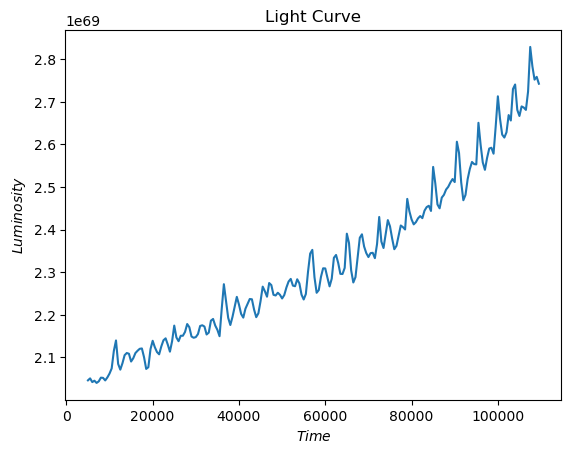

296.0105085372925


In [19]:
import time

start_time =time.time()
light_curve_parallel_plot(210,10,1/800,100)
print(time.time()-start_time)

In [8]:
# 285.3107113838196 pool
# 365.5251133441925 process
# 296.0105085372925 pool for 210 files

64


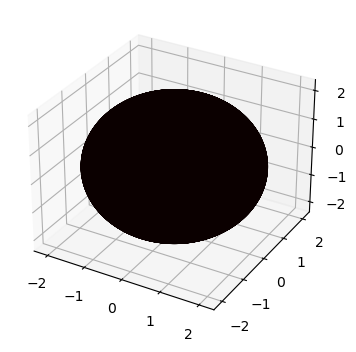

In [22]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
cmhot = plt.get_cmap("hot")
cax = ax.scatter(data['x'],data['y'],data['z'], c=data['rho'], cmap=cmhot)

plt.show()

In [ ]:
plt.savefig("PEGMfig/orbit_wide.pdf",dpi=100)

In [3]:
from athena_read import athdf
data = athdf('../../data/planetary_engulfment_test2/PEGM.out1.00180.athdf')


In [11]:
print(type(data))

<class 'dict'>


In [5]:
#print('total energy: {0}'.format(data['rho'][190,70,146]))
##print('x-bounds: {0} to {1}'.format(data['x1f'][1], data['x1f'][160]))
import numpy as np
#print(np.argwhere(np.isnan(data['vel1'])))
print(list(data))
print(data['VariableNames'])

print(data['Time'])

['Coordinates', 'DatasetNames', 'MaxLevel', 'MeshBlockSize', 'NumCycles', 'NumMeshBlocks', 'NumVariables', 'RootGridSize', 'RootGridX1', 'RootGridX2', 'RootGridX3', 'Time', 'VariableNames', 'x1f', 'x1v', 'x2f', 'x2v', 'x3f', 'x3v', 'rho', 'press', 'vel1', 'vel2', 'vel3', 'r0', 'r1', 'r2', 'r3', 'r4', 'r5', 'r6', 'r7']
[b'rho' b'press' b'vel1' b'vel2' b'vel3' b'r0' b'r1' b'r2' b'r3' b'r4'
 b'r5' b'r6' b'r7']
90000.05


In [4]:
def find_r(file, r_given):
    r_given_filelike = r_given*np.ones_like(file)
    r_index = np.argmin(np.abs(file-r_given_filelike))
    return r_index
 
index = find_r(data["x1v"],6.955e10)
one = np.ones_like(data["rho"])
d_theta = np.pi/data['rho'].shape[1]
d_phi = 2*np.pi/data['rho'].shape[0]

four_pi = np.sum(np.dot(one[:,:,index]*d_theta*d_phi,np.sin(data["x2v"])))
print(four_pi/np.pi)

4.00054531218789


In [19]:
a = np.arange(6).reshape(2,3) + 10
print(np.argmin(a))

0


In [3]:
print(data["rho"][0,0,0])
print(data["rho"][0,0,-1])

5.7860217
1.0176106e-05
